In [153]:
setwd('C:/Users/Victor Momodu/Documents/ADETORO ESL/EXPORTED DATA')

In [19]:
install.packages("readxl") #an excel reader

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Victor Momodu\AppData\Local\Temp\Rtmp886UTX\downloaded_packages


In [12]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [10]:
getwd()

[1] "C:/Users/Victor Momodu"

In [13]:
#importing the 60 by 9 Market data set
#dataoneway <- read.table("onewayanova.txt",h=T)
dataoneway <- read_excel('Palmoil Analysis.xlsx') 
attach(dataoneway)
names(dataoneway)

[1] "market"               "moisture"             "viscosity"           
 [4] "specific gravity"     "IMPURITY"             "REFRACTIVE INDEX"    
 [7] "ACID VALUE"           "PEROXIDE VALUE"       "IODINE VALUE"        
[10] "SAPONIFICATION VALUE"

In [14]:
#NamingEach Market Group Based On the First two letters of the Market Name
dataoneway$market <- substr(dataoneway$market, 1, 2)

In [18]:
class(dataoneway$Group)

[1] "factor"

In [19]:
levels(dataoneway$Group)

[1] "AG" "AY" "BA" "IF" "IK" "LA"

In [20]:
#Assumption 2: Dependent variable is continuous

#Assumption 3: Normal distributions of each group, no major outliers

#Grouping Similar Market Names
Group1 <- subset(dataoneway, Group == "AG")
Group2 <- subset(dataoneway, Group == "AY")
Group3 <- subset(dataoneway, Group == "BA")
Group4 <- subset(dataoneway, Group == "IF")
Group5 <- subset(dataoneway, Group == "IK")
Group6 <- subset(dataoneway, Group == "LA")

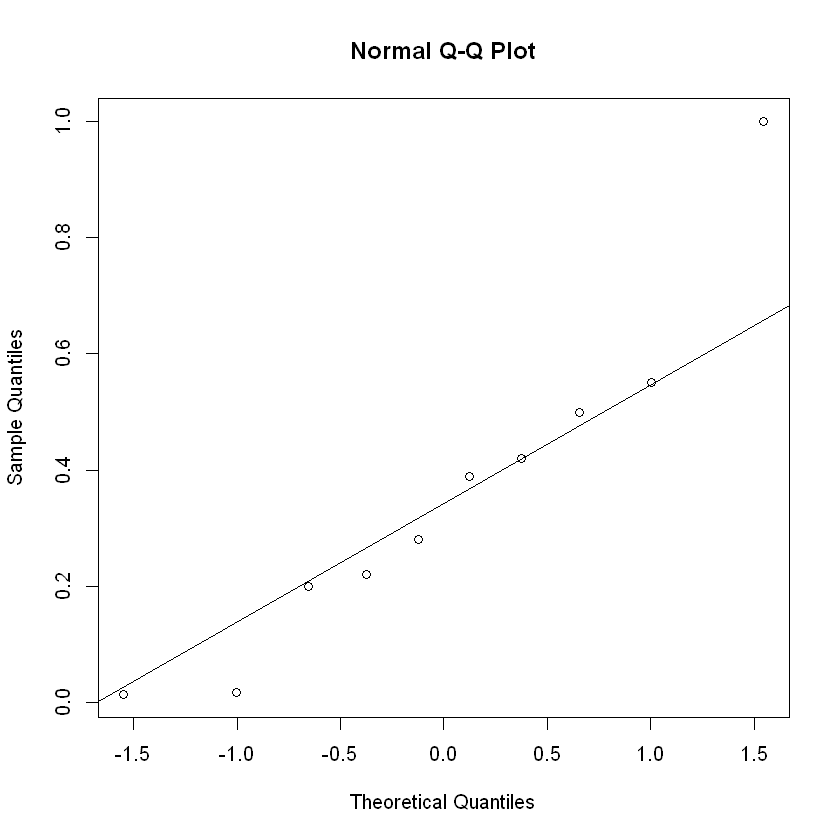

In [21]:
# Assumption 3:Checking if the distribution of moisture values for each group is normal
qqnorm(Group1$moisture)
qqline(Group1$moisture)

In [51]:
#Assumption 4: Homogeneneity of variances
bartlett.test(moisture ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of moisture groups are not equal


	Bartlett test of homogeneity of variances

data:  moisture by Group
Bartlett's K-squared = 76.803, df = 5, p-value = 3.91e-15


In [23]:
### Welch’s anova for unequal variances

oneway.test(moisture ~ Group, data = dataoneway,
            var.equal=FALSE)

 p value is < 0.05, #As the p-value is less than the significance level 0.05, we can conclude that there IS 
#significant difference IN AT ONE OF THE MARKETS.HENCE, REJECT NULL HYPOTHESIS


	One-way analysis of means (not assuming equal variances)

data:  moisture and Group
F = 14.213, num df = 5.000, denom df = 23.261, p-value = 2.005e-06


In [27]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(moisture ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,322.6878,64.537556,18.99525,7.468299e-11
Residuals,54,183.4684,3.397562,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
         diff        lwr       upr     p adj
AY-AG -0.1181 -2.5535528  2.317353 0.9999911
BA-AG  1.4129 -1.0225528  3.848353 0.5288170
IF-AG  6.7749  4.3394472  9.210353 0.0000000
IK-AG  1.1860 -1.2494528  3.621453 0.7035507
LA-AG  2.1729 -0.2625528  4.608353 0.1060838
BA-AY  1.5310 -0.9044528  3.966453 0.4390324
IF-AY  6.8930  4.4575472  9.328453 0.0000000
IK-AY  1.3041 -1.1313528  3.739553 0.6136638
LA-AY  2.2910 -0.1444528  4.726453 0.0764498
IF-BA  5.3620  2.9265472  7.797453 0.0000004
IK-BA -0.2269 -2.6623528  2.208553 0.9997738
LA-BA  0.7600 -1.6754528  3.195453 0.9391464
IK-IF -5.5889 -8.0243528 -3.153447 0.0000001
LA-IF -4.6020 -7.0374528 -2.166547 0.0000114
LA-IK  0.9869 -1.4485528  3.422353 0.8362566


In [34]:
dataoneway$Group

[1] LA LA LA LA LA LA LA LA LA LA AY AY AY AY AY AY AY AY AY AY IF IF IF IF IF
[26] IF IF IF IF IF IK IK IK IK IK IK IK IK IK IK AG AG AG AG AG AG AG AG AG AG
[51] BA BA BA BA BA BA BA BA BA BA
Levels: AG AY BA IF IK LA

In [39]:
#Data visualization snip will be shared

In [41]:
#Viscosity

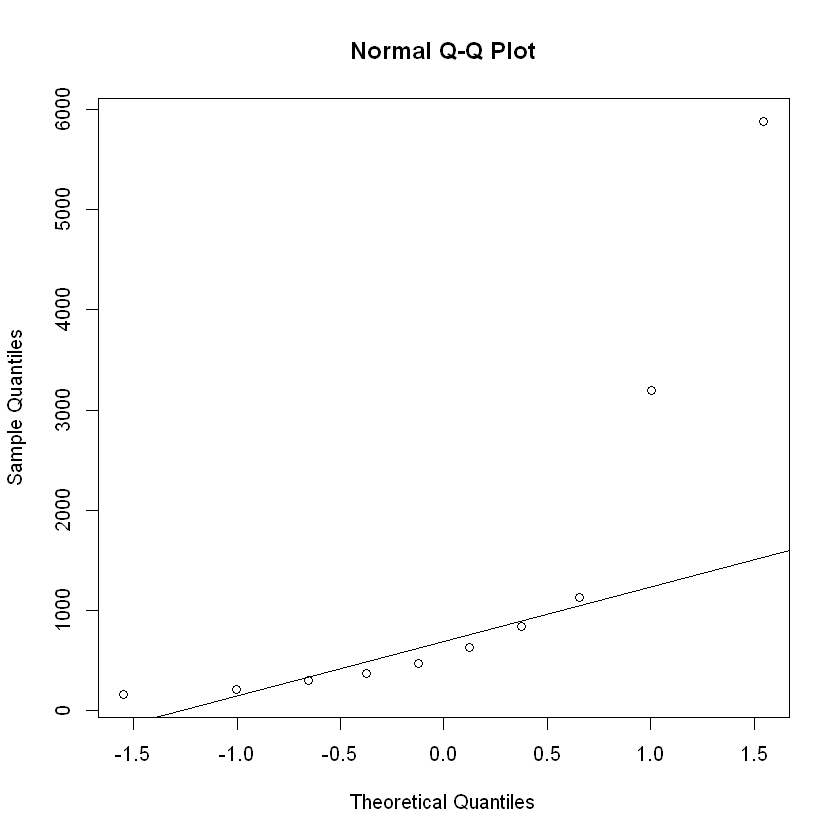

In [43]:
# Assumption 3:Checking if the distribution of moisture values for each group is normal
qqnorm(Group1$viscosity)
qqline(Group1$viscosity)

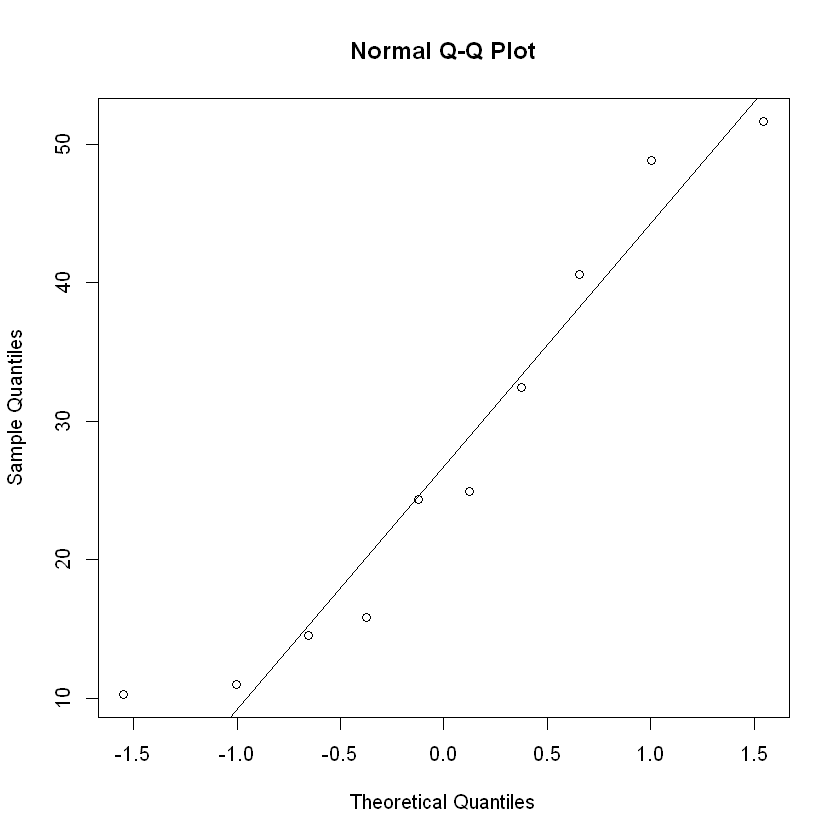

In [45]:
qqnorm(Group2$viscosity)
qqline(Group2$viscosity)

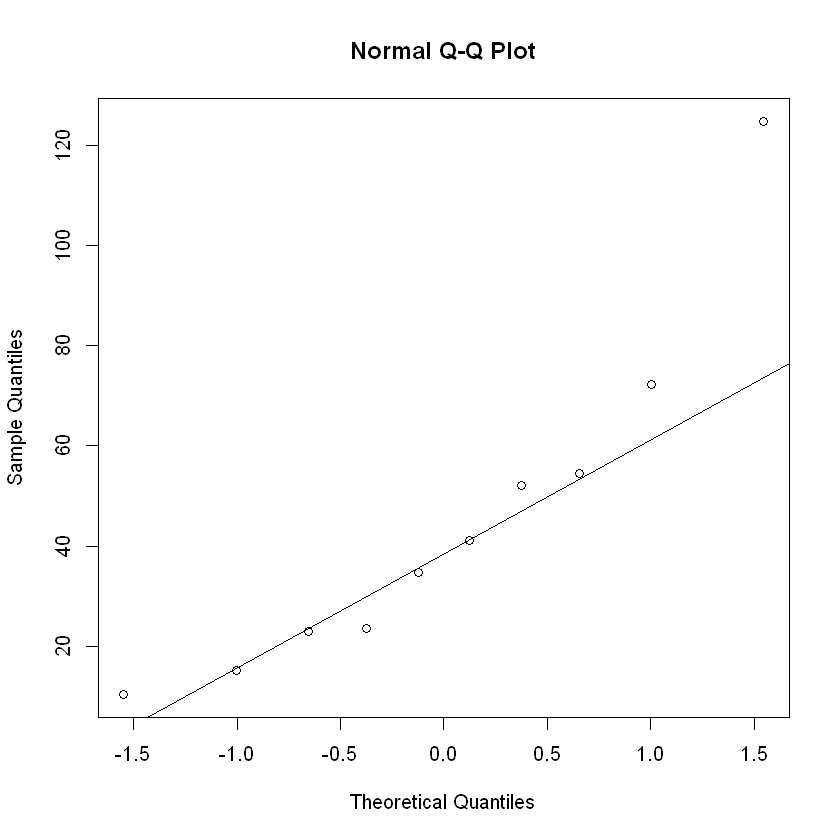

In [47]:
qqnorm(Group3$viscosity)
qqline(Group3$viscosity)

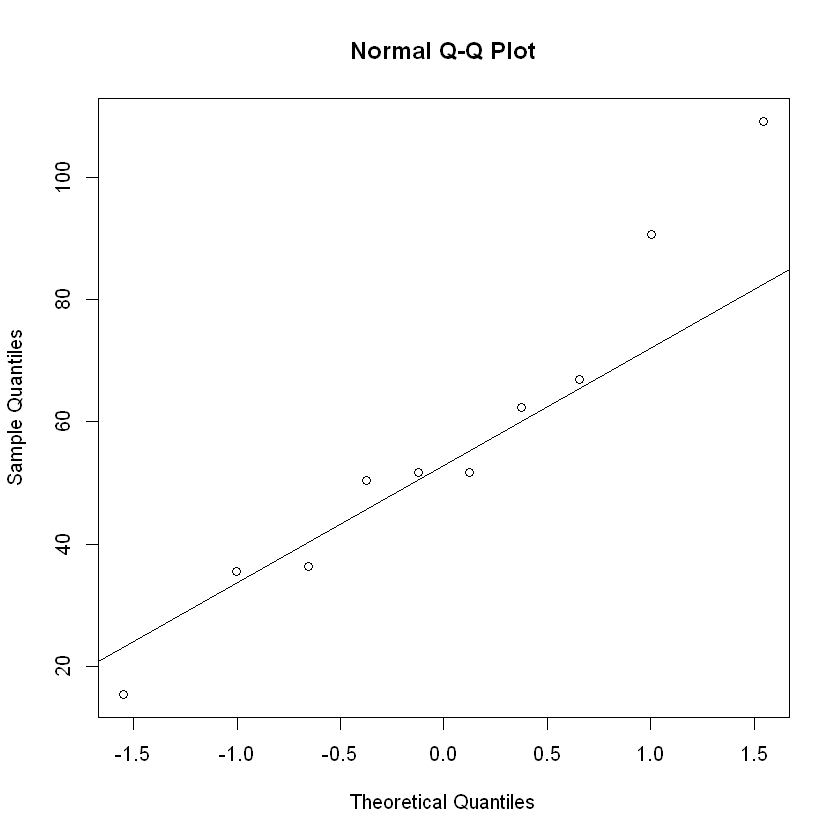

In [49]:
qqnorm(Group4$viscosity)
qqline(Group4$viscosity)

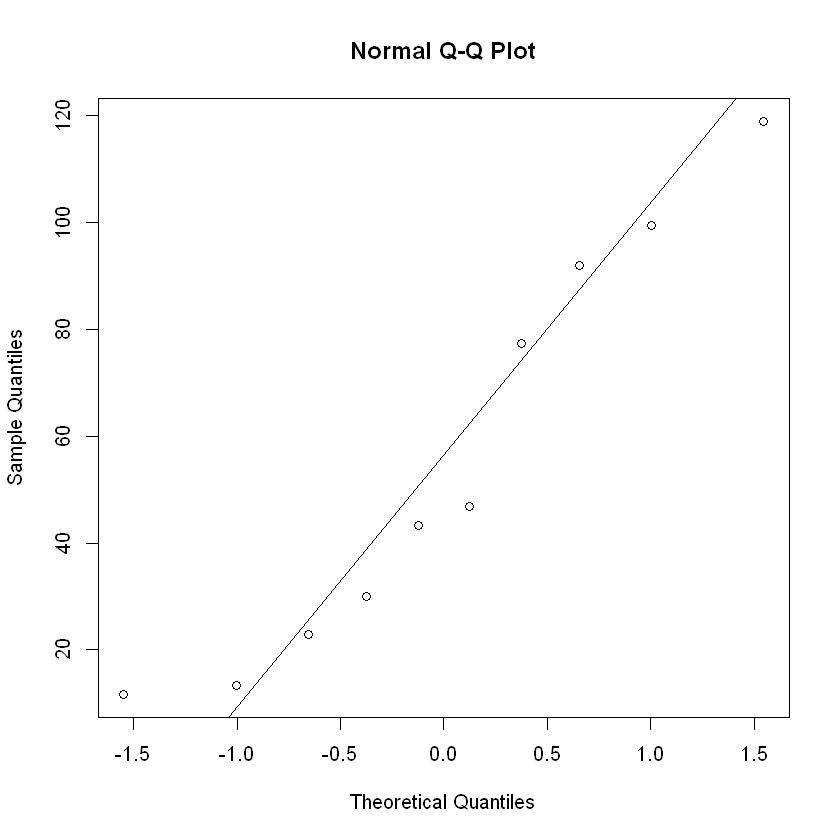

In [52]:
qqnorm(Group5$viscosity)
qqline(Group5$viscosity)

In [54]:
#Assumption 4: Homogeneneity of variances
bartlett.test(viscosity ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of viscosity across
#groups are not equal


	Bartlett test of homogeneity of variances

data:  viscosity by Group
Bartlett's K-squared = 267.52, df = 5, p-value < 2.2e-16


In [57]:
### Welch’s anova for unequal variances

oneway.test(viscosity ~ Group, data = dataoneway,
            var.equal=FALSE)

 #p value is < 0.05, #As the p-value is less than the significance level 0.05, we can conclude that there are 
#significant difference IN AT ONE OF THE MARKETS VALUES


	One-way analysis of means (not assuming equal variances)

data:  viscosity and Group
F = 3.0595, num df = 5.000, denom df = 24.216, p-value = 0.02804


In [58]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(viscosity ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,13506122,2701224.5,4.80104,0.001055794
Residuals,54,30382191,562633.2,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
           diff        lwr       upr     p adj
AY-AG -1289.459 -2280.5389 -298.3791 0.0041366
BA-AG -1271.776 -2262.8559 -280.6961 0.0048589
IF-AG -1259.874 -2250.9539 -268.7941 0.0054104
IK-AG -1261.340 -2252.4199 -270.2601 0.0053394
LA-AG -1281.420 -2272.4999 -290.3401 0.0044514
BA-AY    17.683  -973.3969 1008.7629 0.9999999
IF-AY    29.585  -961.4949 1020.6649 0.9999992
IK-AY    28.119  -962.9609 1019.1989 0.9999994
LA-AY     8.039  -983.0409  999.1189 1.0000000
IF-BA    11.902  -979.1779 1002.9819 1.0000000
IK-BA    10.436  -980.6439 1001.5159 1.0000000
LA-BA    -9.644 -1000.7239  981.4359 1.0000000
IK-IF    -1.466  -992.5459  989.6139 1.0000000
LA-IF   -21.546 -1012.6259  969.5339 0.9999998
LA-IK   -20.080 -1011.1599  970.9999 0.9999999


In [ ]:
#Specific Gravity

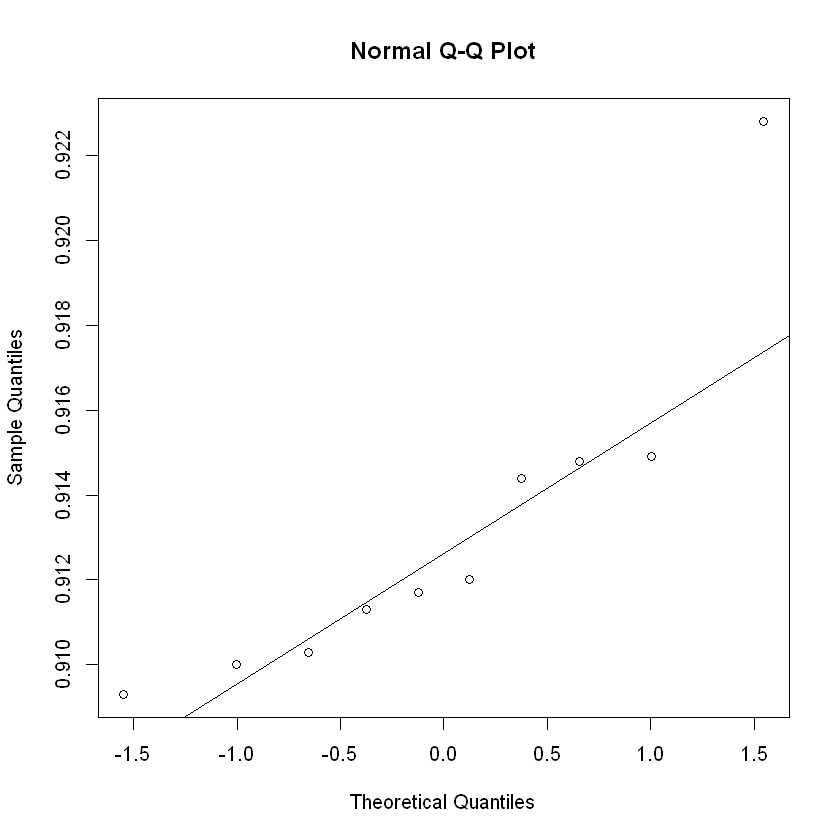

In [67]:
# Assumption 3:Checking if the distribution of moisture values for each group is normal
qqnorm(Group1$`specific gravity`)
qqline(Group1$`specific gravity`)

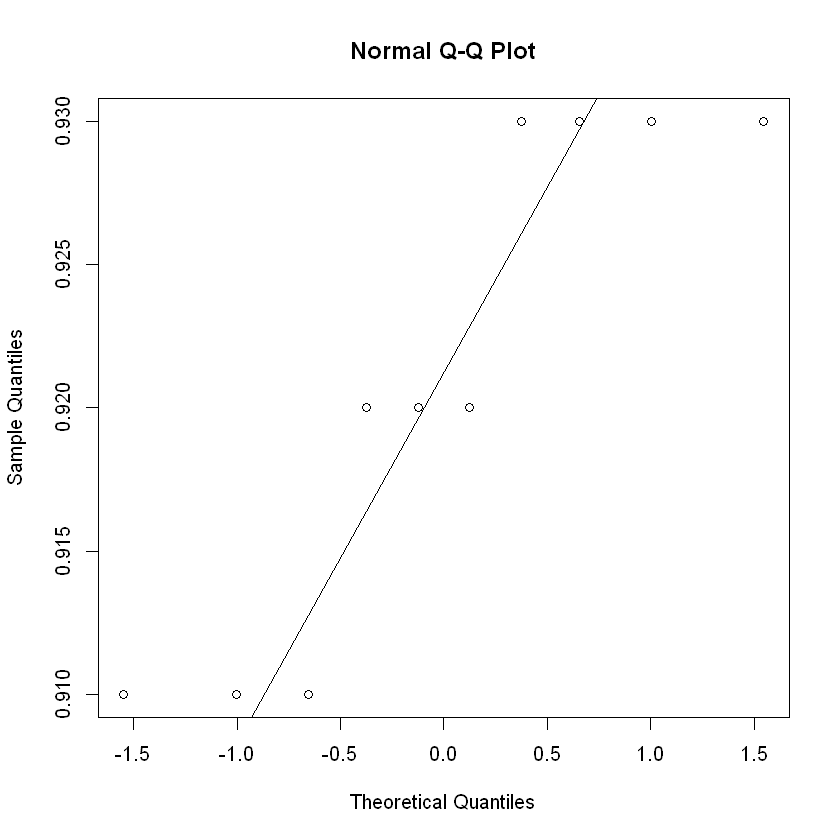

In [68]:
qqnorm(Group2$`specific gravity`)
qqline(Group2$`specific gravity`)

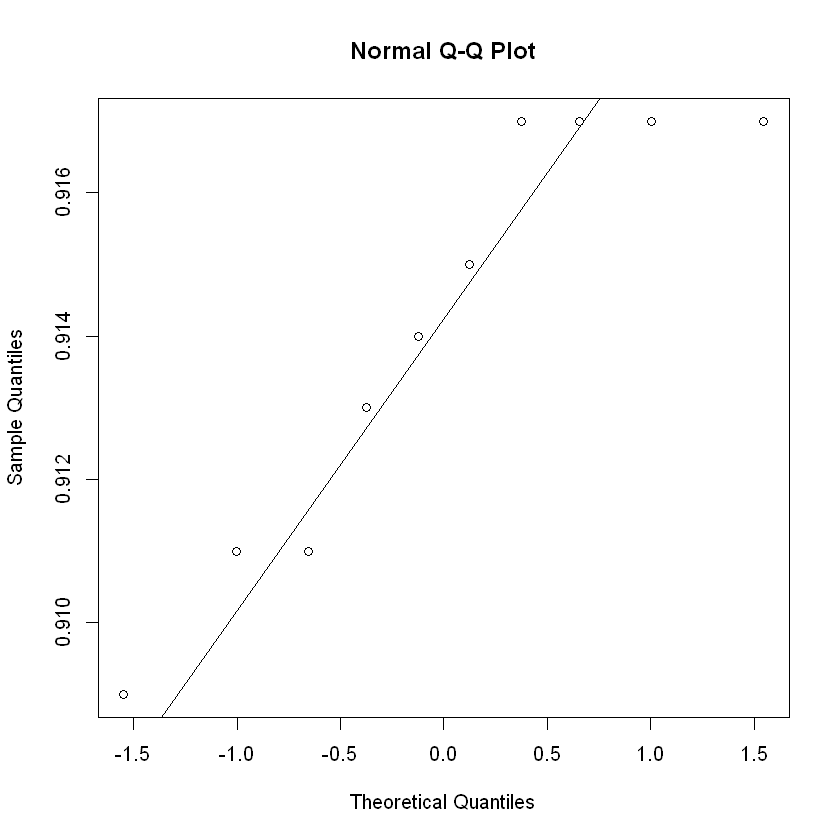

In [69]:
qqnorm(Group3$`specific gravity`)
qqline(Group3$`specific gravity`)

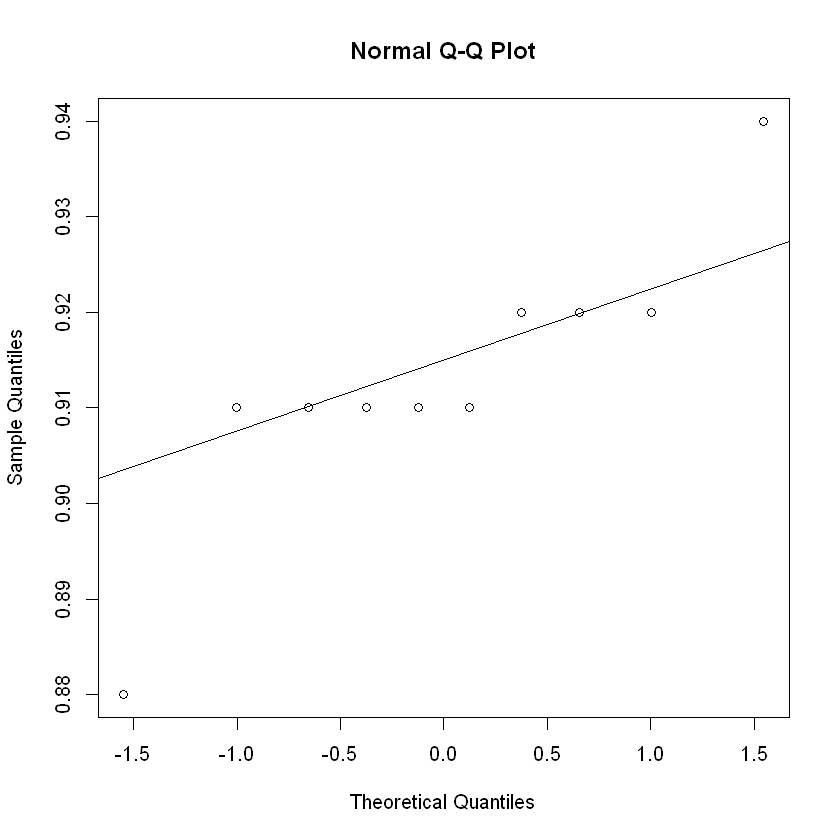

In [70]:
qqnorm(Group4$`specific gravity`)
qqline(Group4$`specific gravity`)

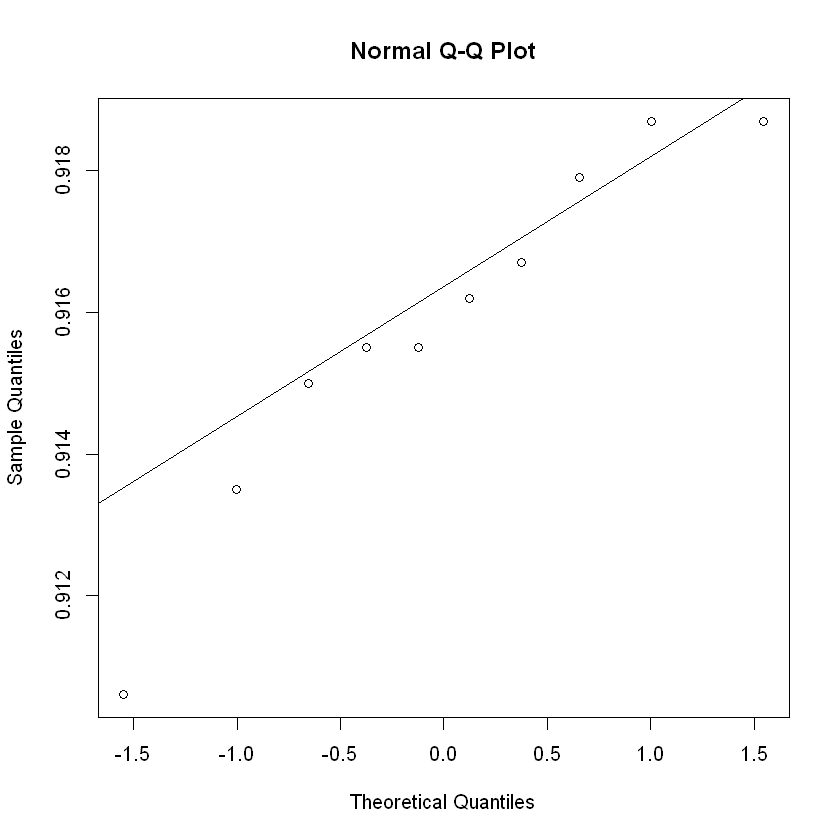

In [71]:
qqnorm(Group5$`specific gravity`)
qqline(Group5$`specific gravity`)

In [72]:
#Assumption 4: Homogeneneity of variances
bartlett.test(`specific gravity` ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of `specific gravity` across
#groups are not equal


	Bartlett test of homogeneity of variances

data:  specific gravity by Group
Bartlett's K-squared = 42.721, df = 5, p-value = 4.208e-08


In [74]:
### Welch’s anova for unequal variances

oneway.test(`specific gravity` ~ Group, data = dataoneway,
            var.equal=FALSE)

 #p value is < 0.05, #As the p-value is less than the significance level 0.05, we can conclude that there are 
#significant differences between the treatment groups.


	One-way analysis of means (not assuming equal variances)

data:  `specific gravity` and Group
F = 3.3816, num df = 5.000, denom df = 24.562, p-value = 0.01837


In [75]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(`specific gravity` ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,0.000650230,1.300460e-04,2.233028,0.06409146
Residuals,54,0.003144826,5.823752e-05,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
          diff          lwr          upr     p adj
AY-AG  0.00785 -0.002233178  0.017933178 0.2119178
BA-AG  0.00095 -0.009133178  0.011033178 0.9997610
IF-AG -0.00015 -0.010233178  0.009933178 1.0000000
IK-AG  0.00268 -0.007403178  0.012763178 0.9688807
LA-AG -0.00275 -0.012833178  0.007333178 0.9652514
BA-AY -0.00690 -0.016983178  0.003183178 0.3438756
IF-AY -0.00800 -0.018083178  0.002083178 0.1948196
IK-AY -0.00517 -0.015253178  0.004913178 0.6563801
LA-AY -0.01060 -0.020683178 -0.000516822 0.0339664
IF-BA -0.00110 -0.011183178  0.008983178 0.9995105
IK-BA  0.00173 -0.008353178  0.011813178 0.9957006
LA-BA -0.00370 -0.013783178  0.006383178 0.8855744
IK-IF  0.00283 -0.007253178  0.012913178 0.9607582
LA-IF -0.00260 -0.012683178  0.007483178 0.9726955
LA-IK -0.00543 -0.015513178  0.004653178 0.6078738


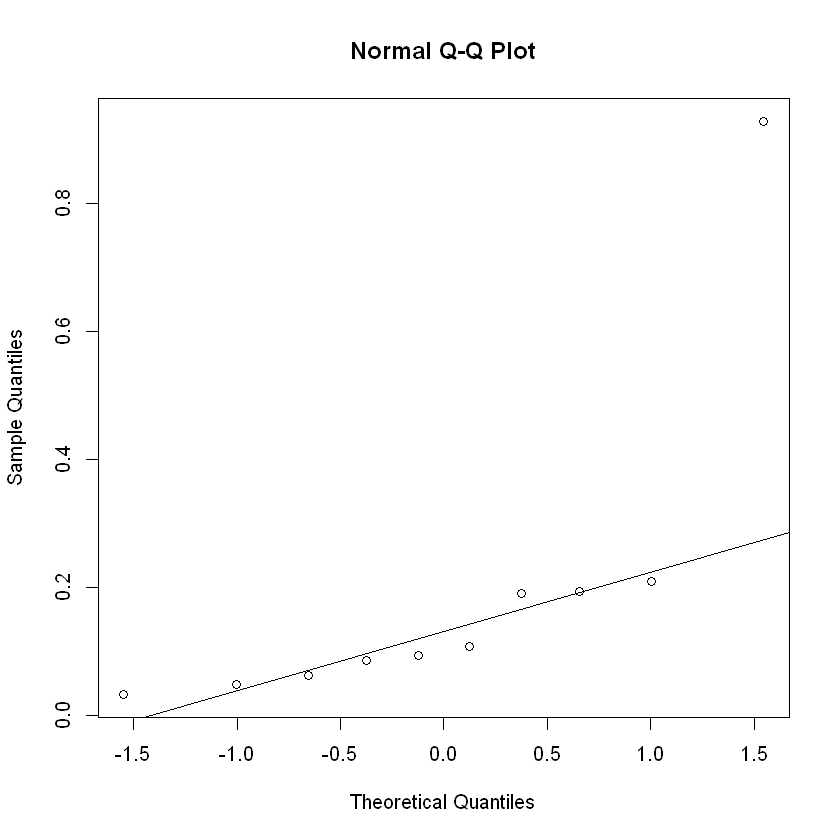

In [86]:
qqnorm(Group1$IMPURITY)
qqline(Group1$IMPURITY)

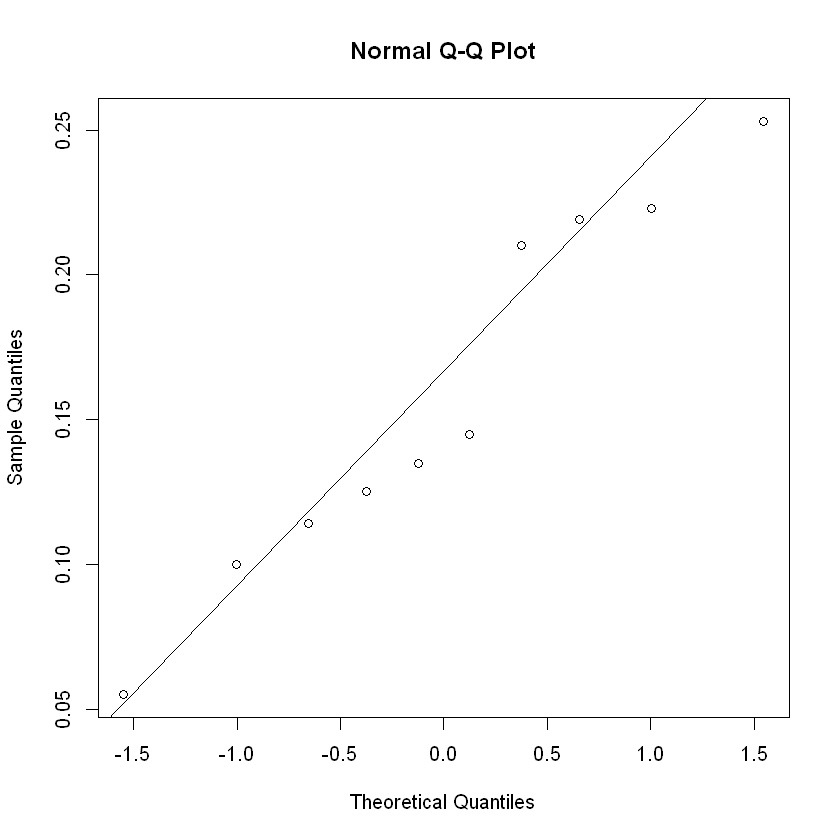

In [85]:
qqnorm(Group2$IMPURITY)
qqline(Group2$IMPURITY)

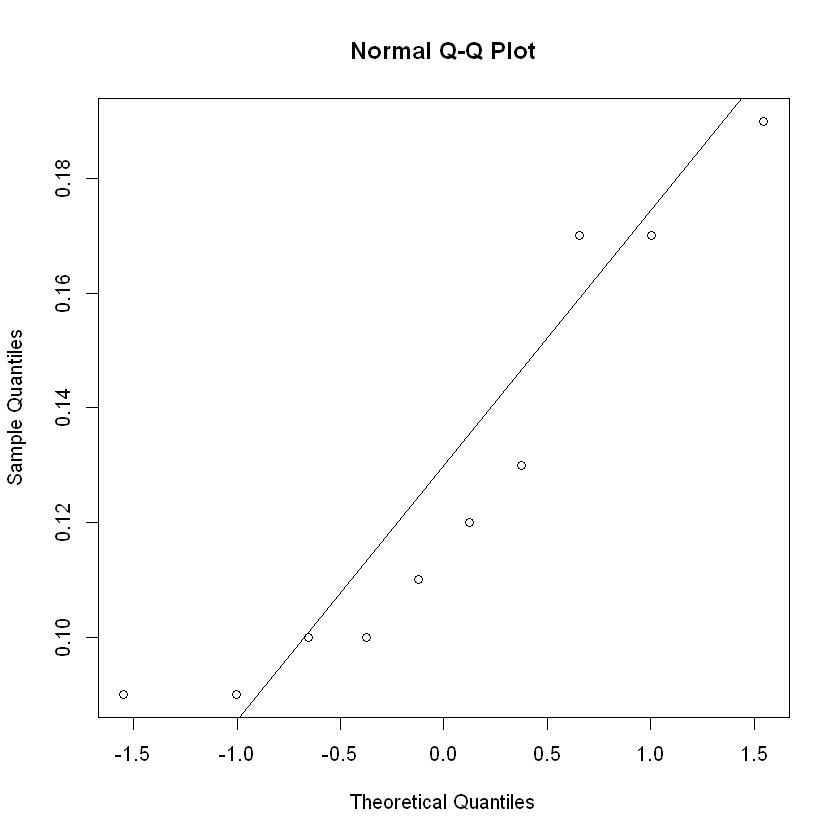

In [84]:
qqnorm(Group3$IMPURITY)
qqline(Group3$IMPURITY)

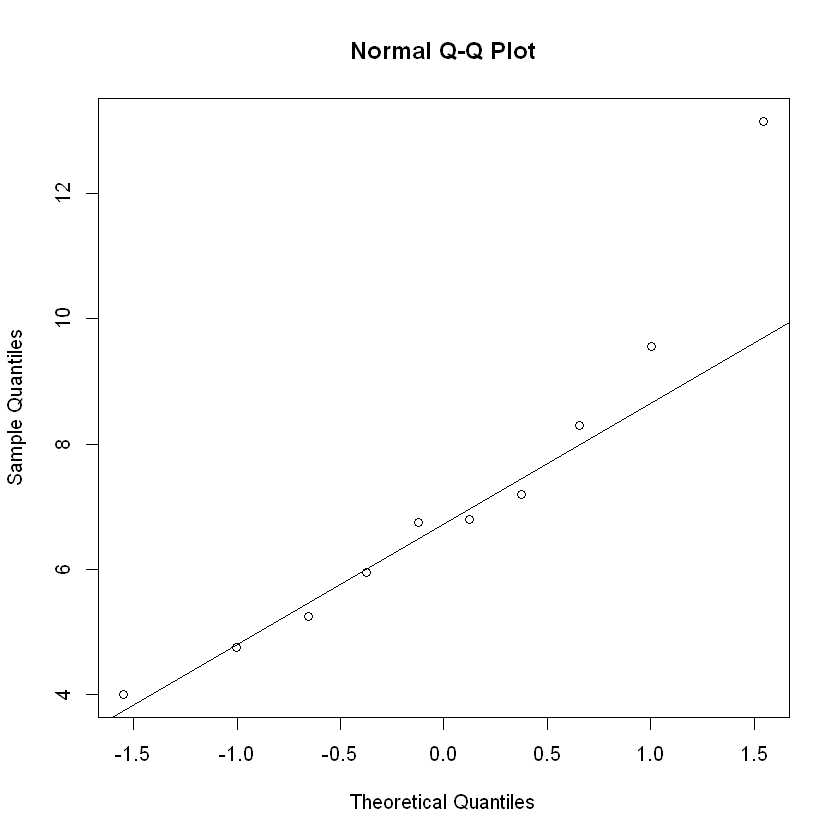

In [83]:
qqnorm(Group4$IMPURITY)
qqline(Group4$IMPURITY)

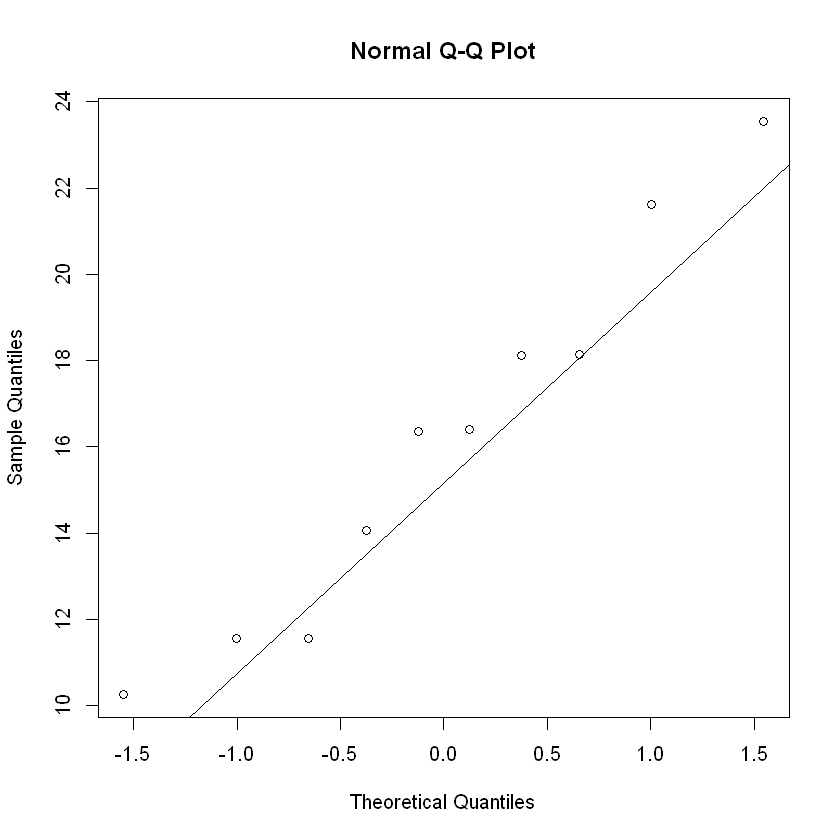

In [82]:
qqnorm(Group5$IMPURITY)
qqline(Group5$IMPURITY)

In [ ]:
IMPURITY

In [79]:
#Assumption 4: Homogeneneity of variances
bartlett.test(IMPURITY ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of `specific gravity` across
#groups are not equal


	Bartlett test of homogeneity of variances

data:  IMPURITY by Group
Bartlett's K-squared = 156.99, df = 5, p-value < 2.2e-16


In [80]:
### Welch’s anova for unequal variances

oneway.test(IMPURITY ~ Group, data = dataoneway,
            var.equal=FALSE)

 #p value is < 0.05, #As the p-value is less than the significance level 0.05, we can conclude that there are 
#significant differences between the treatment groups.


	One-way analysis of means (not assuming equal variances)

data:  IMPURITY and Group
F = 97.178, num df = 5.000, denom df = 22.774, p-value = 1.381e-14


In [81]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(IMPURITY ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,2389.0864,477.817272,94.10681,2.115845e-25
Residuals,54,274.1792,5.077393,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
         diff       lwr       upr     p adj
AY-AG -0.0381 -3.015357  2.939157 1.0000000
BA-AG -0.0690 -3.046257  2.908257 0.9999998
IF-AG  6.9740  3.996743  9.951257 0.0000001
IK-AG 15.9620 12.984743 18.939257 0.0000000
LA-AG 11.4690  8.491743 14.446257 0.0000000
BA-AY -0.0309 -3.008157  2.946357 1.0000000
IF-AY  7.0121  4.034843  9.989357 0.0000001
IK-AY 16.0001 13.022843 18.977357 0.0000000
LA-AY 11.5071  8.529843 14.484357 0.0000000
IF-BA  7.0430  4.065743 10.020257 0.0000001
IK-BA 16.0310 13.053743 19.008257 0.0000000
LA-BA 11.5380  8.560743 14.515257 0.0000000
IK-IF  8.9880  6.010743 11.965257 0.0000000
LA-IF  4.4950  1.517743  7.472257 0.0005726
LA-IK -4.4930 -7.470257 -1.515743 0.0005764


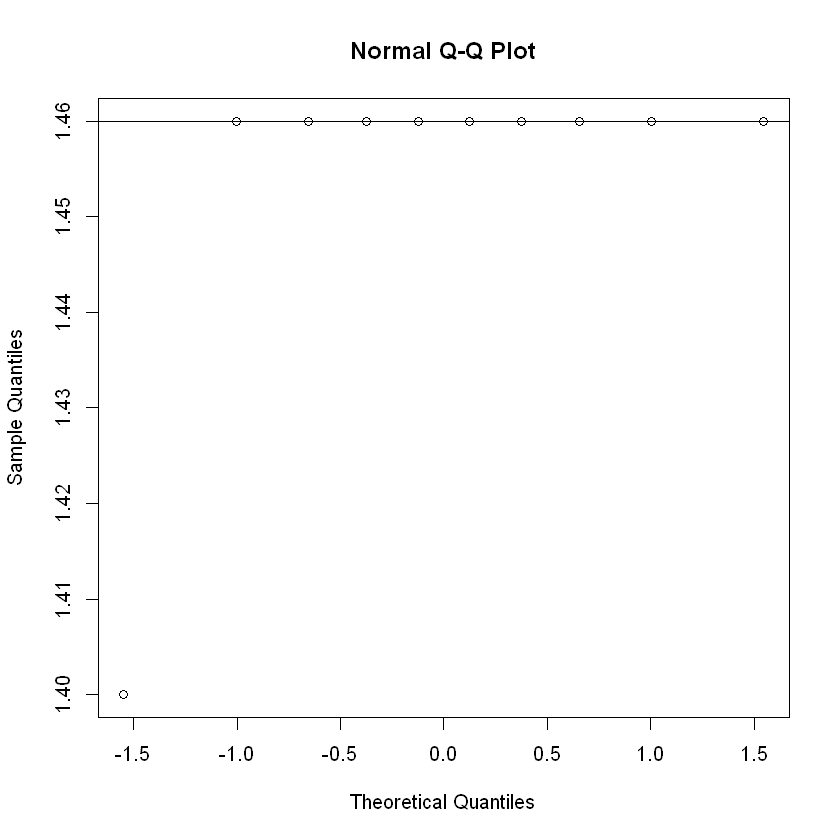

In [89]:
##REFRACTIVE INDEX

qqnorm(Group1$`REFRACTIVE INDEX`)
qqline(Group1$`REFRACTIVE INDEX`)

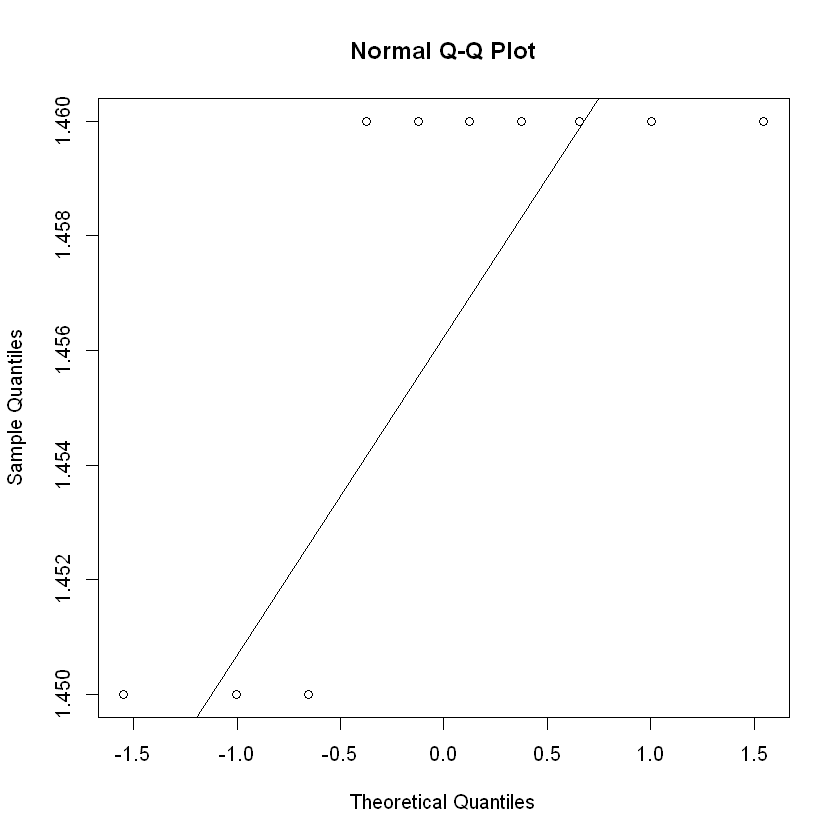

In [90]:
qqnorm(Group2$`REFRACTIVE INDEX`)
qqline(Group2$`REFRACTIVE INDEX`)

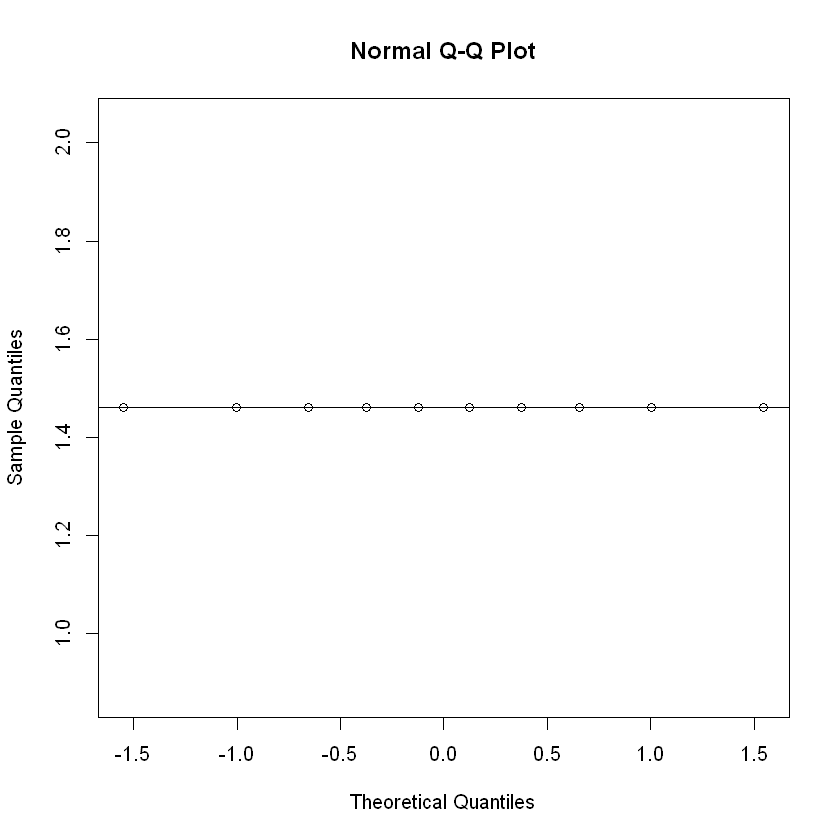

In [91]:
qqnorm(Group3$`REFRACTIVE INDEX`)
qqline(Group3$`REFRACTIVE INDEX`)

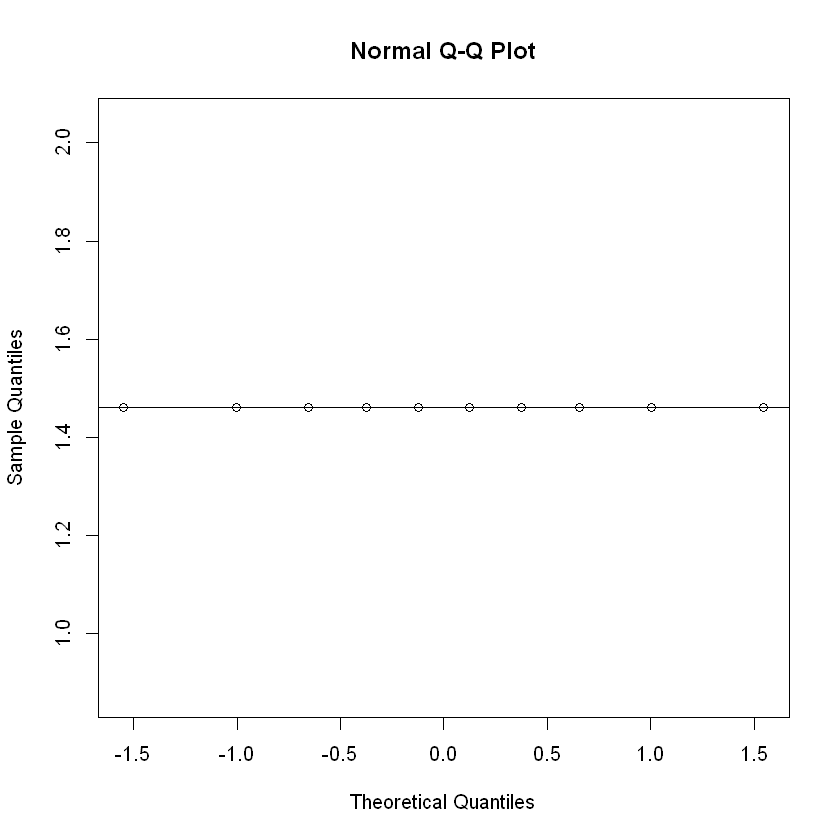

In [92]:
qqnorm(Group4$`REFRACTIVE INDEX`)
qqline(Group4$`REFRACTIVE INDEX`)

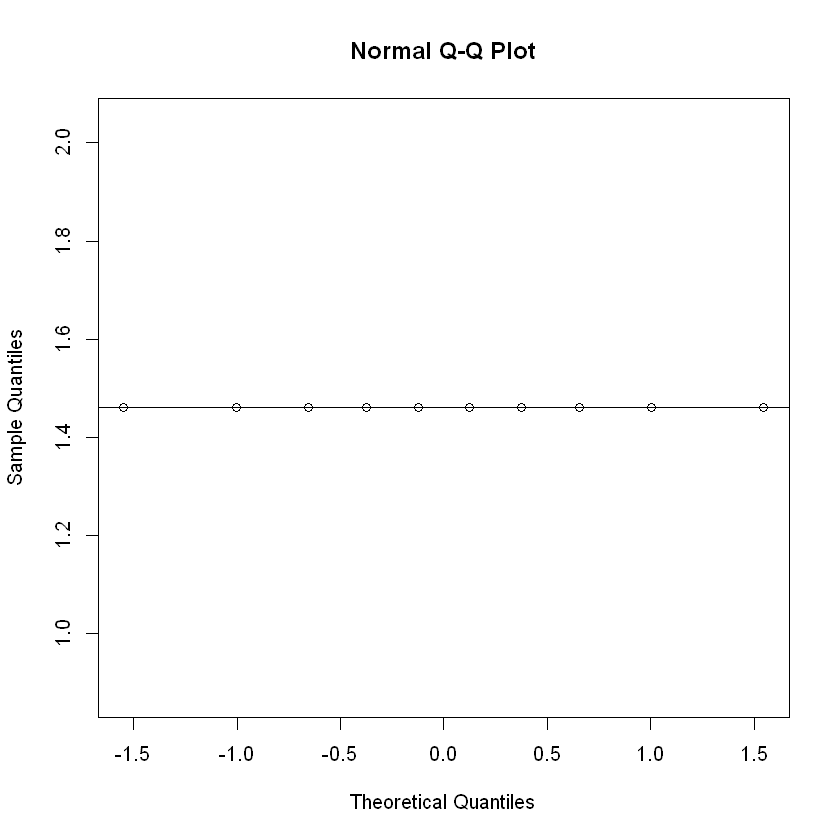

In [93]:
qqnorm(Group5$`REFRACTIVE INDEX`)
qqline(Group5$`REFRACTIVE INDEX`)

In [102]:
### Welch’s anova for unequal variances

oneway.test(`REFRACTIVE INDEX` ~ Group, data = dataoneway,
            var.equal=TRUE)

 #p value is < 0.05, there is a difference in viscosity between markets


	One-way analysis of means

data:  `REFRACTIVE INDEX` and Group
F = 0.98609, num df = 5, denom df = 54, p-value = 0.4348


In [105]:
library('car')

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [106]:
#Levene Test is an alternative to bartlett.test. It is considered when the p_vale from welch anova is NA, that is the no significance 
#difference in the refractive index between markets
leveneTest(`REFRACTIVE INDEX` ~ Group, data = dataoneway) 

,Df,F value,Pr(>F)
group,5,0.986087,0.4348486
,54,NA,NA


In [98]:
#Unlike other parameters,One way ANova Test is used here because there is no significance difference in the values of 
#refractive index
model1 = lm(`REFRACTIVE INDEX` ~ Group, data = dataoneway)
anova(model1)

 #p value is > 0.05, there is no significance difference in refractive index between markets, HENCE, ACCEPT NULL HYPOTHESIS

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,0.000315,6.300000e-05,0.986087,0.4348486
Residuals,54,0.003450,6.388889e-05,NA,NA


In [97]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1))#none of the p-values is less than alpha(0.05) #A confirmation that there is truly no significance diffrence

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,0.000315,6.300000e-05,0.986087,0.4348486
Residuals,54,0.003450,6.388889e-05,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
               diff          lwr        upr     p adj
AY-AG  3.000000e-03 -0.007561088 0.01356109 0.9587194
BA-AG  6.000000e-03 -0.004561088 0.01656109 0.5515946
IF-AG  6.000000e-03 -0.004561088 0.01656109 0.5515946
IK-AG  6.000000e-03 -0.004561088 0.01656109 0.5515946
LA-AG  6.000000e-03 -0.004561088 0.01656109 0.5515946
BA-AY  3.000000e-03 -0.007561088 0.01356109 0.9587194
IF-AY  3.000000e-03 -0.007561088 0.01356109 0.9587194
IK-AY  3.000000e-03 -0.007561088 0.01356109 0.9587194
LA-AY  3.000000e-03 -0.007561088 0.01356109 0.9587194
IF-BA  0.000000e+00 -0.010561088 0.01056109 1.0000000
IK-BA  0.000000e+00 -0.010561088 0.01056109 1.0000000
LA-BA -2.220446e-16 -0.010561088 0.01056109 1.0000000
IK-IF  0.000000e+00 -0.010561088 0.01056109 1.0000000
LA-IF -2.220446e-16 -0.010561088 0.01056109 1.0000000
LA-IK -2.220446e-16 -0.010561088 0.01056109 1.0000000


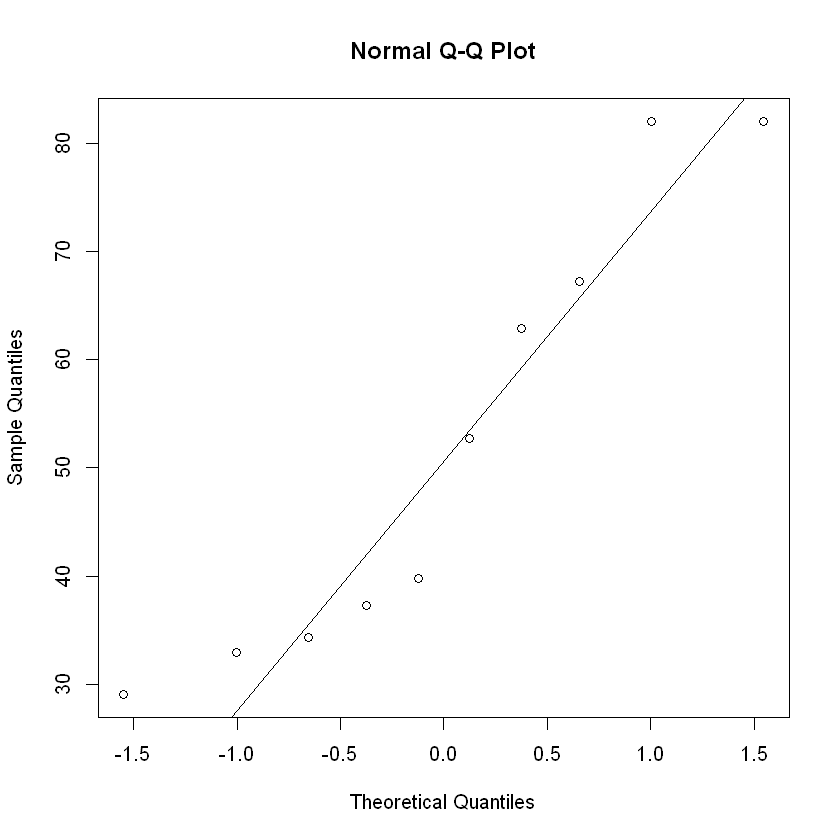

In [112]:
qqnorm(Group1$`ACID VALUE`)
qqline(Group1$`ACID VALUE`)

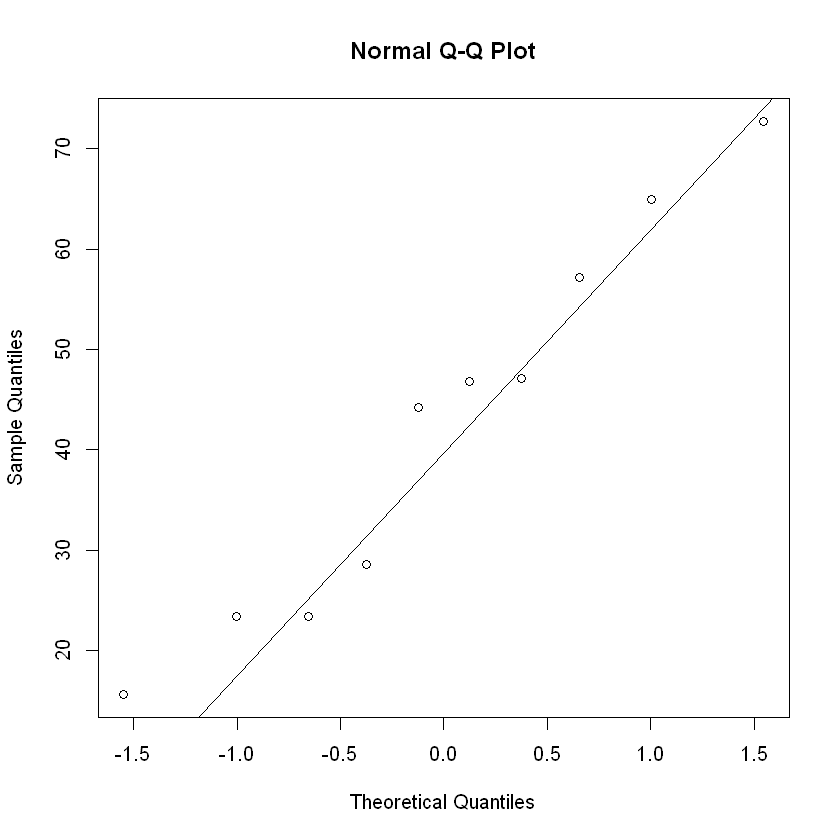

In [111]:
qqnorm(Group2$`ACID VALUE`)
qqline(Group2$`ACID VALUE`)

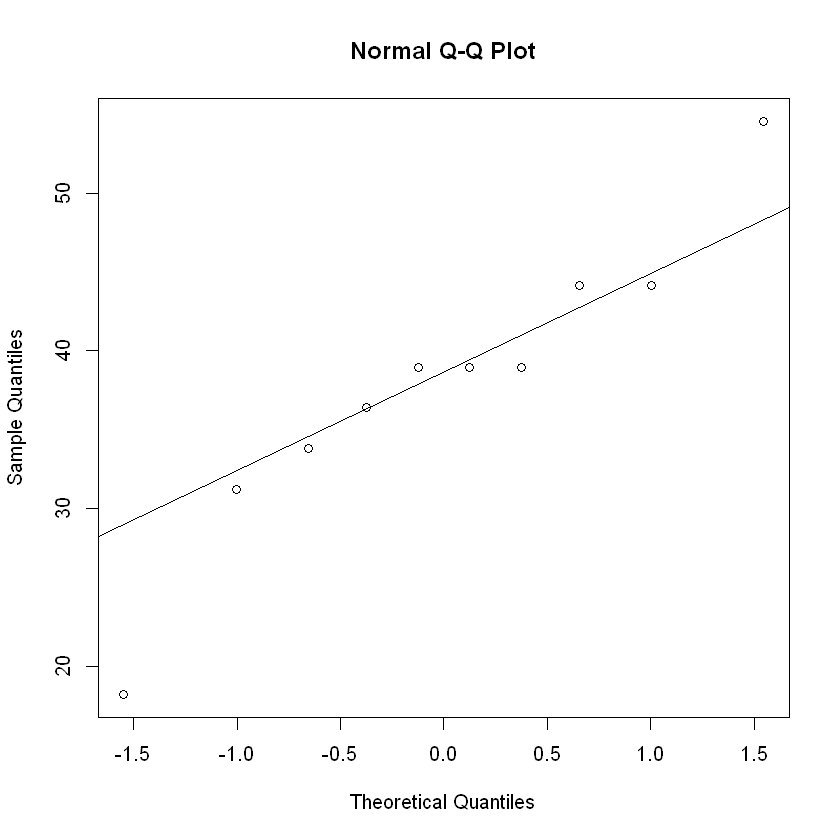

In [109]:
qqnorm(Group3$`ACID VALUE`)
qqline(Group3$`ACID VALUE`)

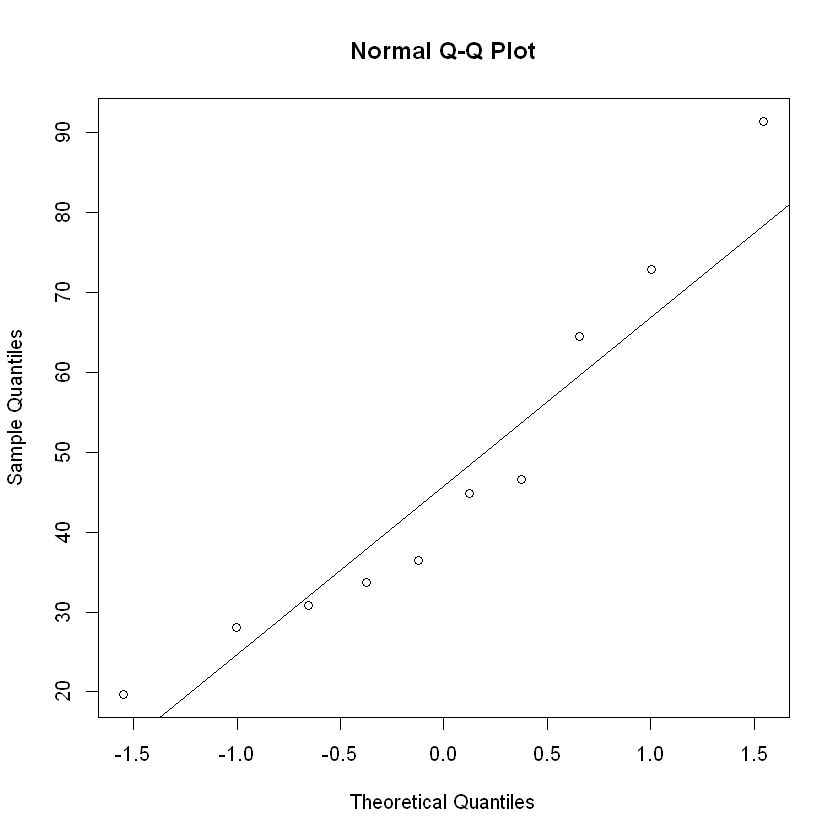

In [108]:
qqnorm(Group4$`ACID VALUE`)
qqline(Group4$`ACID VALUE`)

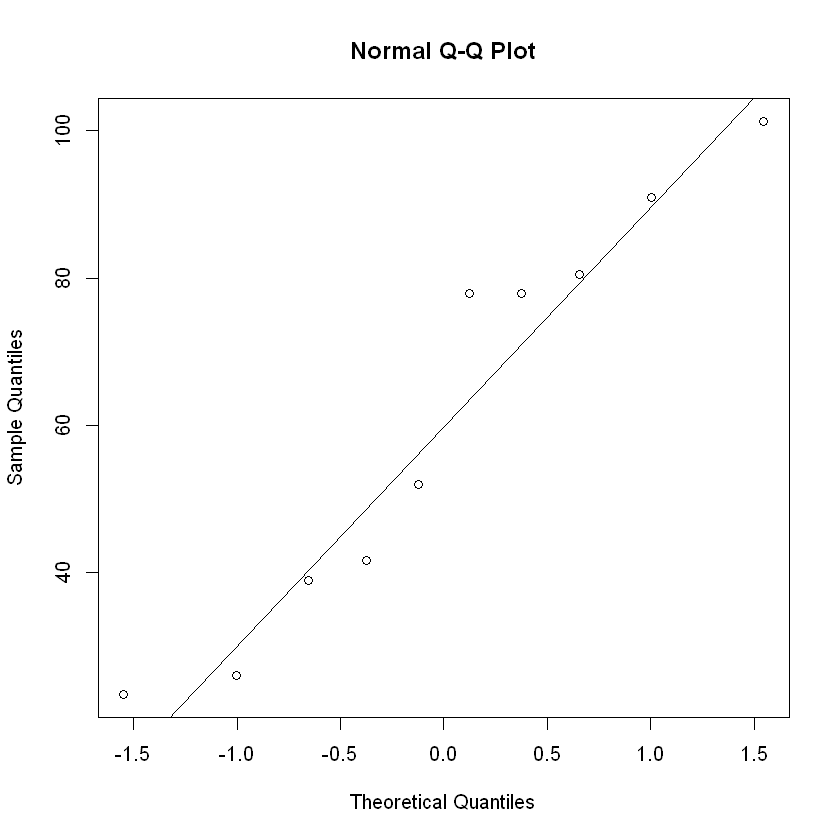

In [107]:
qqnorm(Group5$`ACID VALUE`)
qqline(Group5$`ACID VALUE`)

In [115]:
#Assumption 4: Homogeneneity of variances
bartlett.test(`ACID VALUE` ~ Group, data = dataoneway) # p.value is >0.05 which infers that the variance of `specific gravity` across
#groups are  equal


	Bartlett test of homogeneity of variances

data:  ACID VALUE by Group
Bartlett's K-squared = 16.404, df = 5, p-value = 0.005781


In [118]:
#ONE WAY ANOVA TEST
model1 = lm(`ACID VALUE` ~ Group, data = dataoneway)
anova(model1)

 #p value is > 0.05, there is NO difference in viscosity between markets, ACCEPT NULL HYPOTHESIS

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,3251.122,650.2245,1.737596,0.1417334
Residuals,54,20207.293,374.2091,NA,NA


In [114]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(`ACID VALUE` ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

#NOTE THE THERE IS A DIFFERENCE IN THE ACID VALUE OF IK-AY MARKETS

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,3251.122,650.2245,1.737596,0.1417334
Residuals,54,20207.293,374.2091,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
          diff       lwr      upr     p adj
AY-AG  -9.6445 -35.20405 15.91505 0.8731342
BA-AG -14.0992 -39.65875 11.46035 0.5829826
IF-AG  -5.1195 -30.67905 20.44005 0.9911757
IK-AG   9.0175 -16.54205 34.57705 0.9013446
LA-AG  -1.6314 -27.19095 23.92815 0.9999650
BA-AY  -4.4547 -30.01425 21.10485 0.9953721
IF-AY   4.5250 -21.03455 30.08455 0.9950201
IK-AY  18.6620  -6.89755 44.22155 0.2746648
LA-AY   8.0131 -17.54645 33.57265 0.9379938
IF-BA   8.9797 -16.57985 34.53925 0.9029148
IK-BA  23.1167  -2.44285 48.67625 0.0978407
LA-BA  12.4678 -13.09175 38.02735 0.7020750
IK-IF  14.1370 -11.42255 39.69655 0.5801689
LA-IF   3.4881 -22.07145 29.04765 0.9985522
LA-IK -10.6489 -36.20845 14.91065 0.8197830


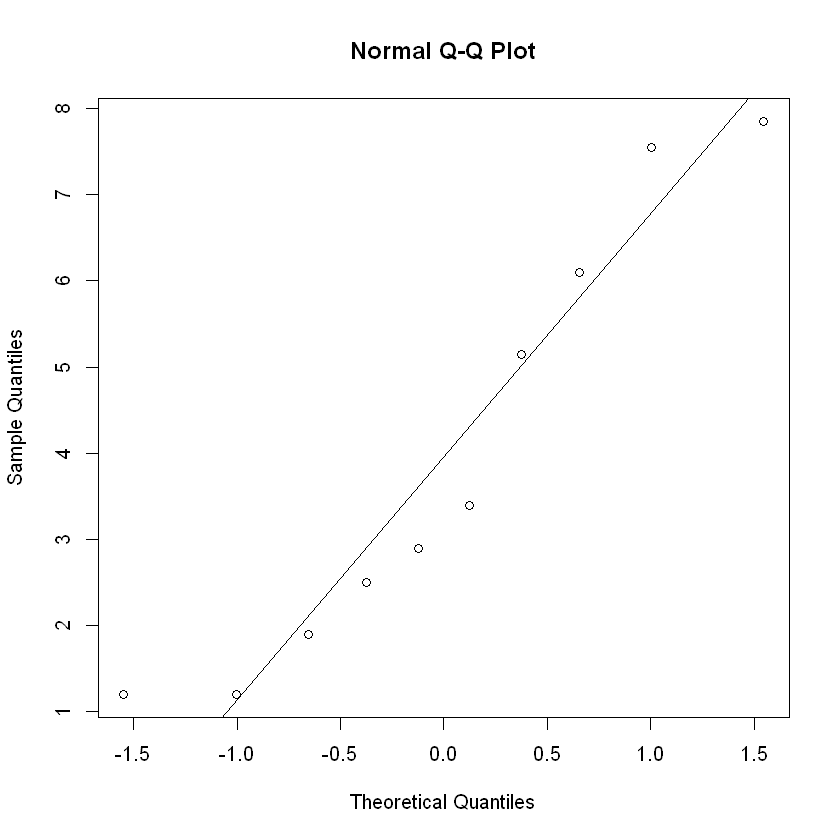

In [124]:
qqnorm(Group1$`PEROXIDE VALUE`)
qqline(Group1$`PEROXIDE VALUE`)

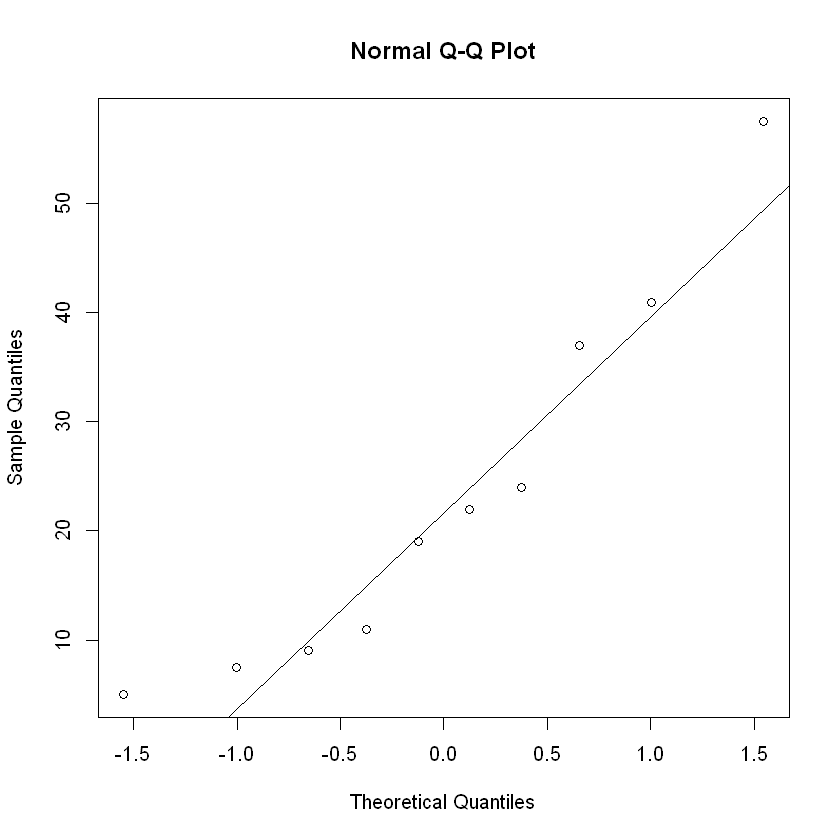

In [123]:
qqnorm(Group2$`PEROXIDE VALUE`)
qqline(Group2$`PEROXIDE VALUE`)

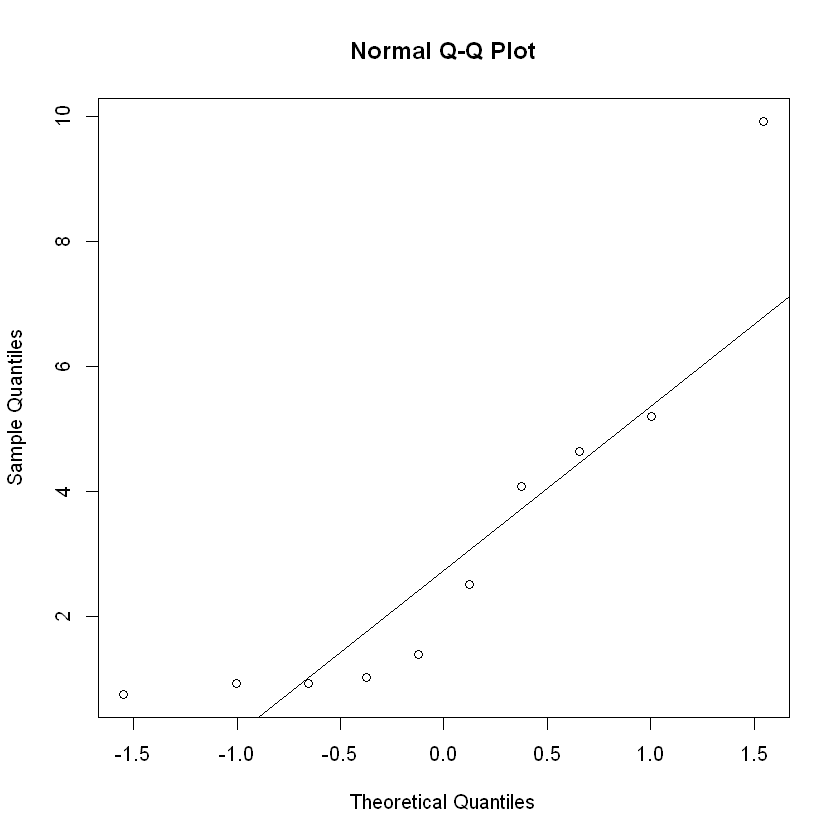

In [122]:
qqnorm(Group3$`PEROXIDE VALUE`)
qqline(Group3$`PEROXIDE VALUE`)

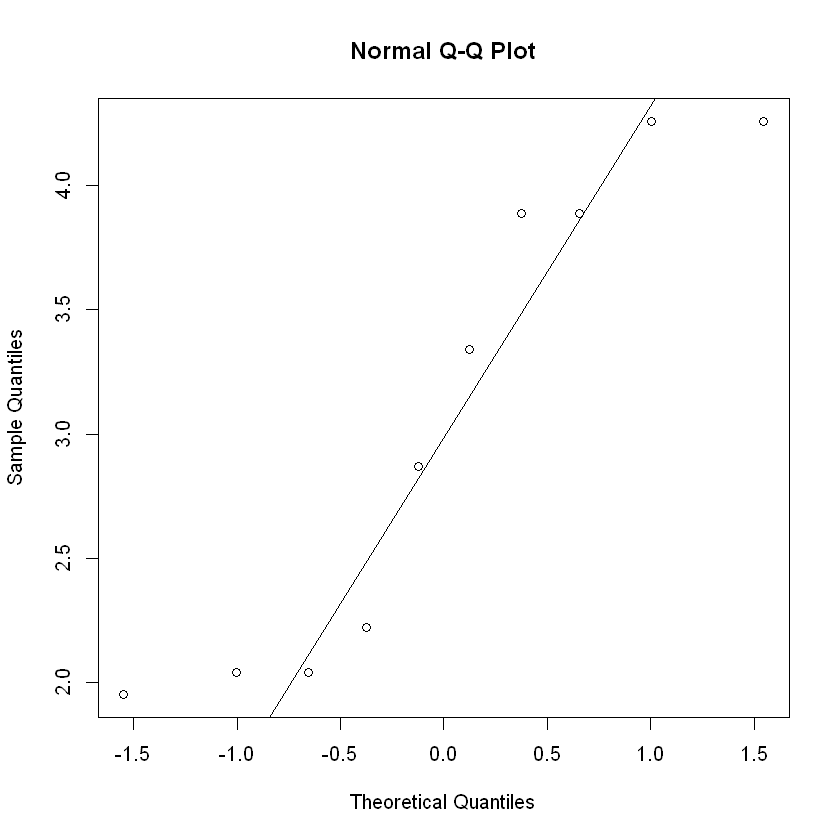

In [121]:
qqnorm(Group4$`PEROXIDE VALUE`)
qqline(Group4$`PEROXIDE VALUE`)

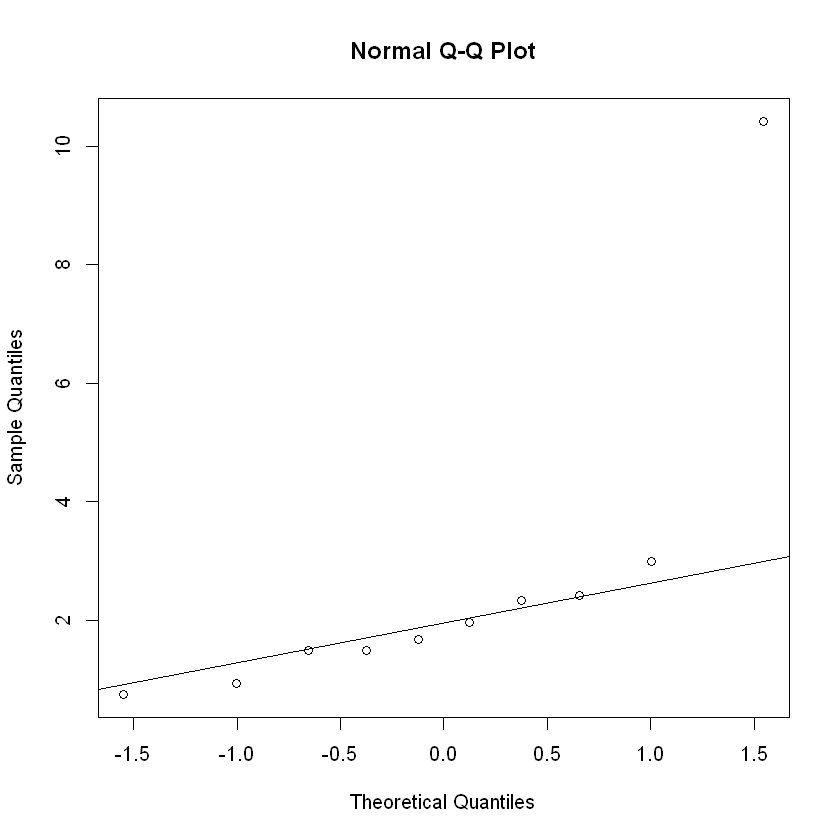

In [120]:
qqnorm(Group5$`PEROXIDE VALUE`)
qqline(Group5$`PEROXIDE VALUE`)

In [125]:
#Assumption 4: Homogeneneity of variances
bartlett.test(`PEROXIDE VALUE` ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of `specific gravity` across
#groups are not equal


	Bartlett test of homogeneity of variances

data:  PEROXIDE VALUE by Group
Bartlett's K-squared = 89.545, df = 5, p-value < 2.2e-16


In [126]:
### Welch’s anova for unequal variances

oneway.test(`PEROXIDE VALUE` ~ Group, data = dataoneway,
            var.equal=FALSE)

 #p value is < 0.05, there is a difference in AT LEAST ON EOF THE ACID VALUE between markets


	One-way analysis of means (not assuming equal variances)

data:  `PEROXIDE VALUE` and Group
F = 2.8019, num df = 5.000, denom df = 23.539, p-value = 0.03993


In [129]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(`PEROXIDE VALUE` ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,3344.108,668.82169,12.45815,4.688988e-08
Residuals,54,2899.017,53.68549,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
           diff        lwr        upr     p adj
AY-AG  19.31700   9.635905  28.998095 0.0000037
BA-AG  -0.83974 -10.520835   8.841355 0.9998408
IF-AG  -0.89700 -10.578095   8.784095 0.9997799
IK-AG  -1.33100 -11.012095   8.350095 0.9984997
LA-AG  -0.34860 -10.029695   9.332495 0.9999980
BA-AY -20.15674 -29.837835 -10.475645 0.0000014
IF-AY -20.21400 -29.895095 -10.532905 0.0000013
IK-AY -20.64800 -30.329095 -10.966905 0.0000008
LA-AY -19.66560 -29.346695  -9.984505 0.0000025
IF-BA  -0.05726  -9.738355   9.623835 1.0000000
IK-BA  -0.49126 -10.172355   9.189835 0.9999888
LA-BA   0.49114  -9.189955  10.172235 0.9999888
IK-IF  -0.43400 -10.115095   9.247095 0.9999940
LA-IF   0.54840  -9.132695  10.229495 0.9999807
LA-IK   0.98240  -8.698695  10.663495 0.9996562


In [132]:
#Assumption 4: Homogeneneity of variances
bartlett.test(`IODINE VALUE` ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of `specific gravity` across
#groups are not equal


	Bartlett test of homogeneity of variances

data:  IODINE VALUE by Group
Bartlett's K-squared = 47.62, df = 5, p-value = 4.246e-09


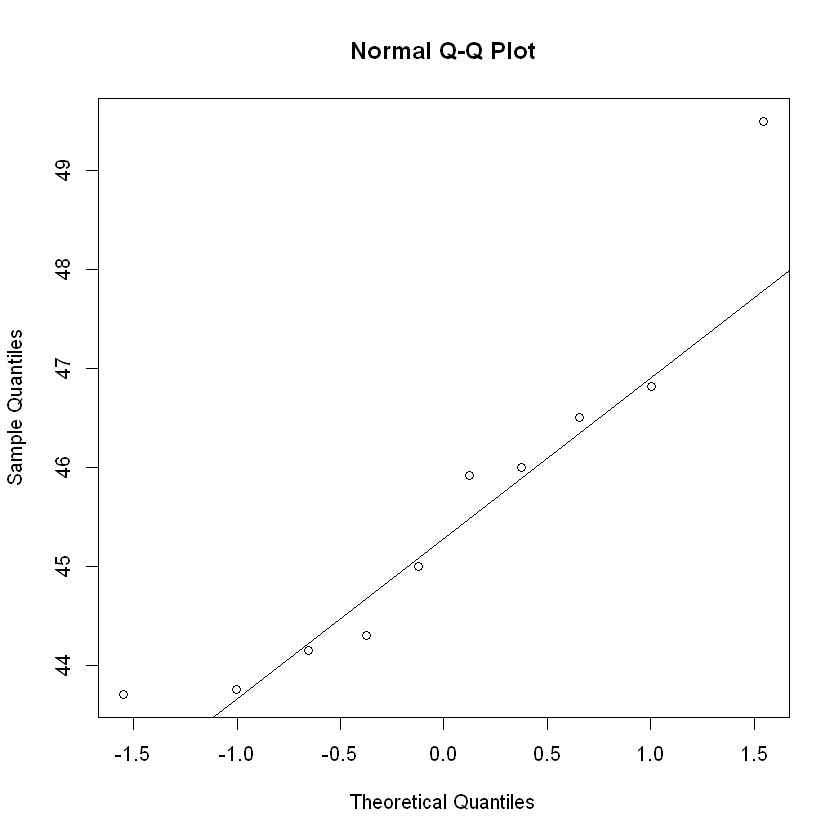

In [146]:
qqnorm(Group1$`IODINE VALUE`)
qqline(Group1$`IODINE VALUE`)

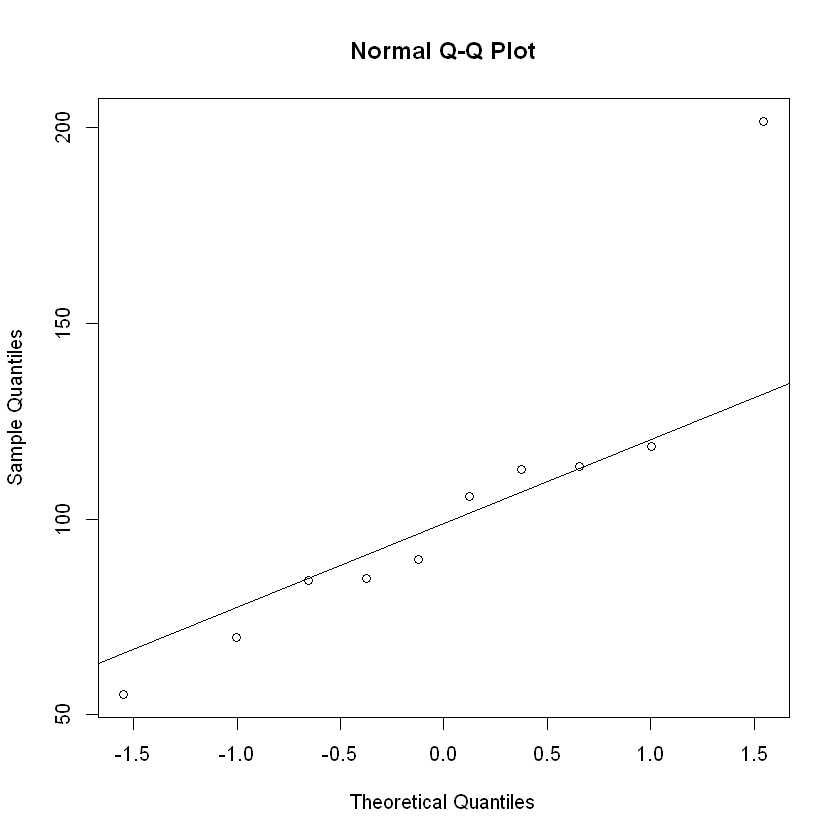

In [145]:
qqnorm(Group2$`IODINE VALUE`)
qqline(Group2$`IODINE VALUE`)

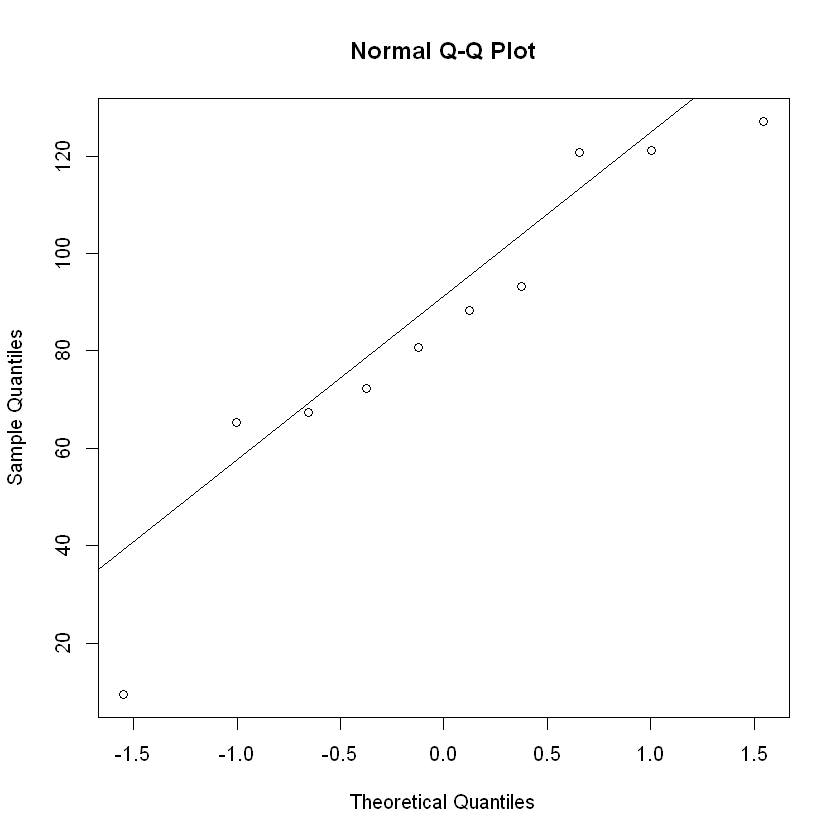

In [144]:
qqnorm(Group3$`IODINE VALUE`)
qqline(Group3$`IODINE VALUE`)

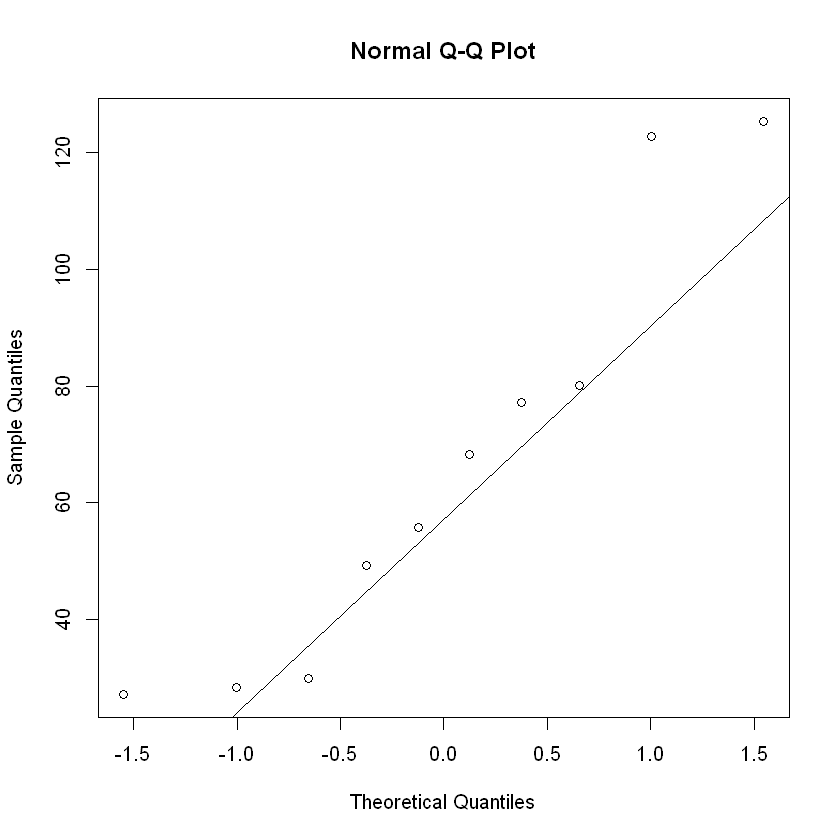

In [143]:
qqnorm(Group4$`IODINE VALUE`)
qqline(Group4$`IODINE VALUE`)

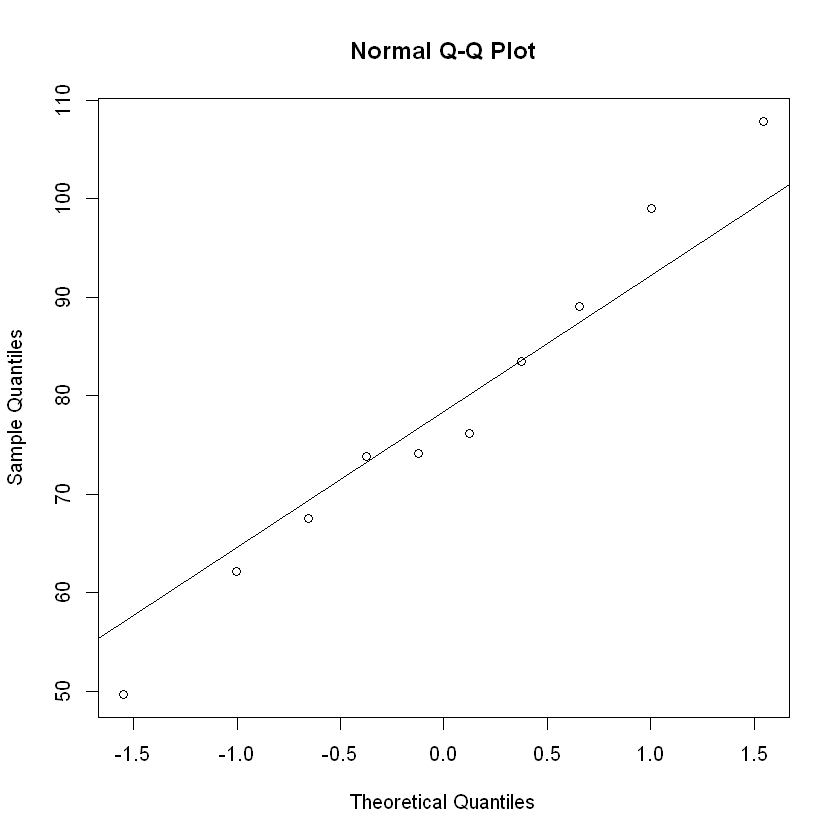

In [141]:
qqnorm(Group5$`IODINE VALUE`)
qqline(Group5$`IODINE VALUE`)

In [135]:
### Welch’s anova for unequal variances

oneway.test(`IODINE VALUE` ~ Group, data = dataoneway,
            var.equal=FALSE)

 #p value is < 0.05, there is a difference in AT LEAST ON OF THE ACID VALUE between markets


	One-way analysis of means (not assuming equal variances)

data:  `IODINE VALUE` and Group
F = 23.293, num df = 5.000, denom df = 21.198, p-value = 5.971e-08


In [137]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(`IODINE VALUE` ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,24018.07,4803.6136,5.842804,0.0002200309
Residuals,54,44395.66,822.1418,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
           diff        lwr        upr     p adj
AY-AG  58.00300  20.117818 95.8881818 0.0004643
BA-AG  38.97626   1.091078 76.8614418 0.0403233
IF-AG  20.88200 -17.003182 58.7671818 0.5838004
IK-AG  32.72600  -5.159182 70.6111818 0.1273905
LA-AG  55.72758  17.842398 93.6127618 0.0008371
BA-AY -19.02674 -56.911922 18.8584418 0.6758313
IF-AY -37.12100 -75.006182  0.7641818 0.0579316
IK-AY -25.27700 -63.162182 12.6081818 0.3719494
LA-AY  -2.27542 -40.160602 35.6097618 0.9999741
IF-BA -18.09426 -55.979442 19.7909218 0.7202277
IK-BA  -6.25026 -44.135442 31.6349218 0.9964249
LA-BA  16.75132 -21.133862 54.6365018 0.7802711
IK-IF  11.84400 -26.041182 49.7291818 0.9386935
LA-IF  34.84558  -3.039602 72.7307618 0.0882518
LA-IK  23.00158 -14.883602 60.8867618 0.4782608


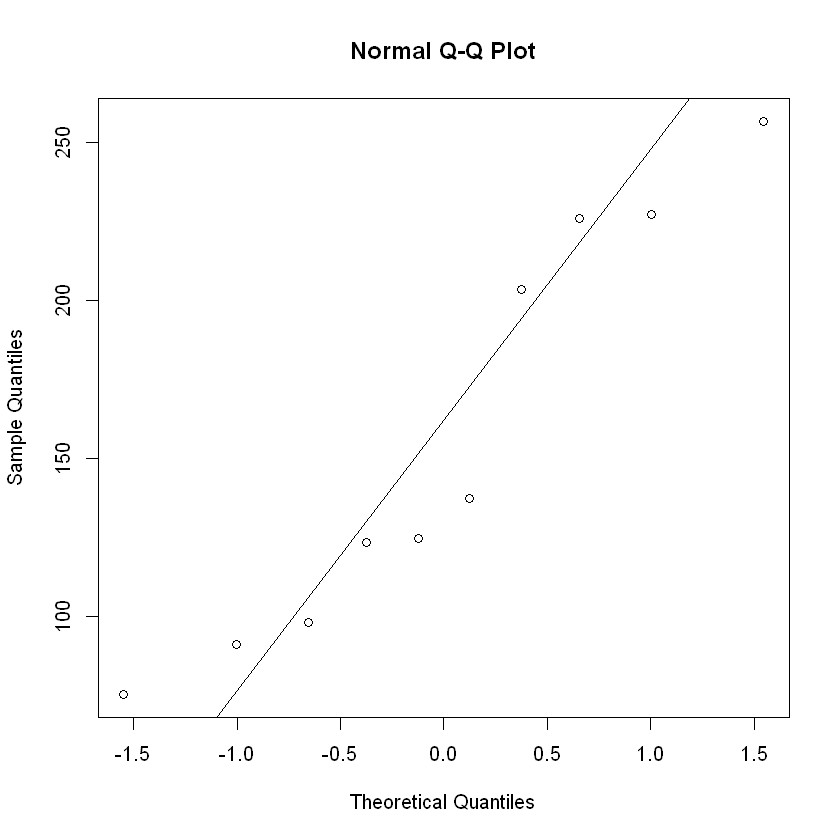

In [152]:
qqnorm(Group1$`SAPONIFICATION VALUE`)
qqline(Group1$`SAPONIFICATION VALUE`)

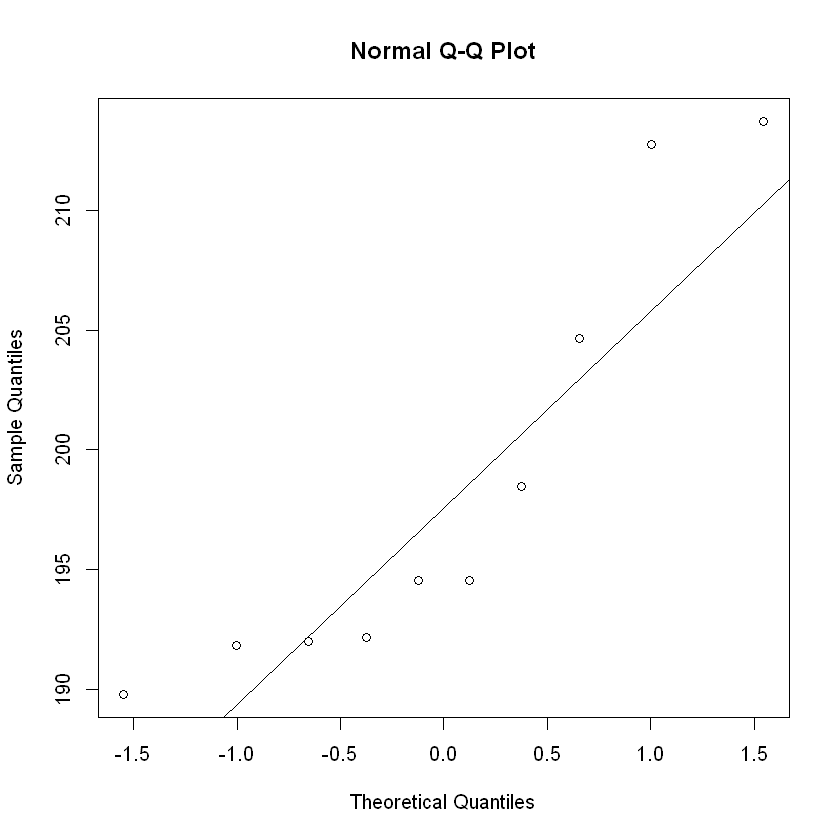

In [151]:
qqnorm(Group2$`SAPONIFICATION VALUE`)
qqline(Group2$`SAPONIFICATION VALUE`)

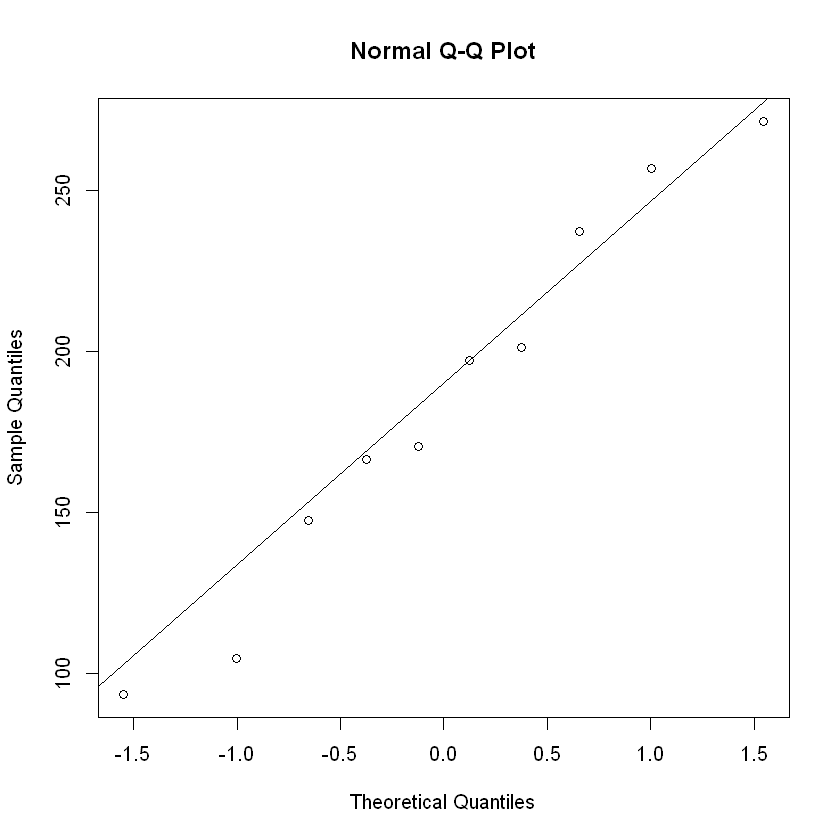

In [150]:
qqnorm(Group3$`SAPONIFICATION VALUE`)
qqline(Group3$`SAPONIFICATION VALUE`)

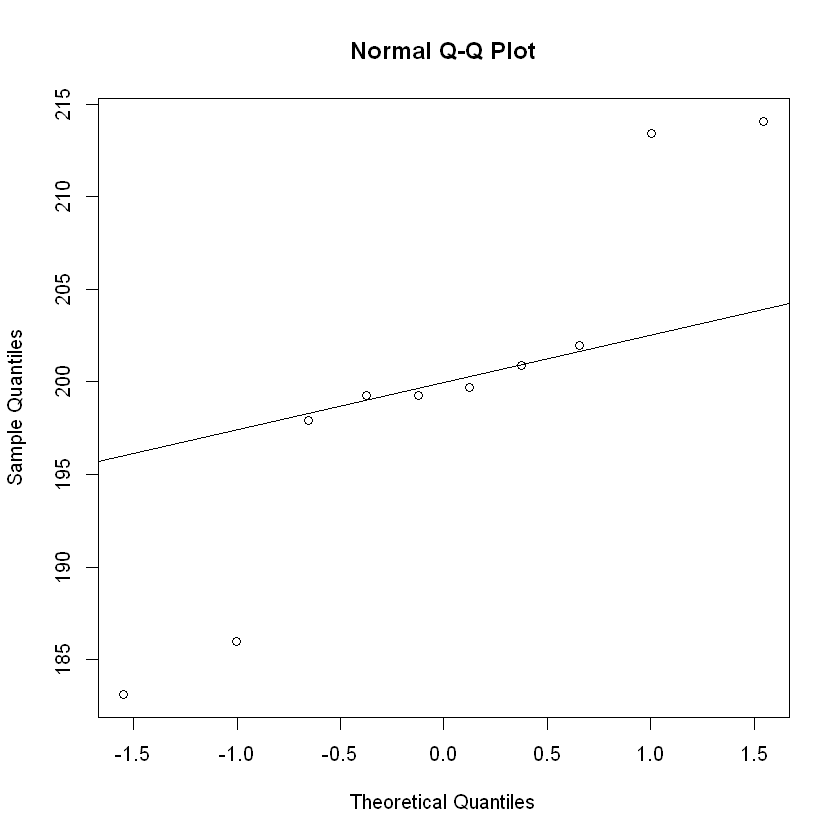

In [149]:
qqnorm(Group4$`SAPONIFICATION VALUE`)
qqline(Group4$`SAPONIFICATION VALUE`)

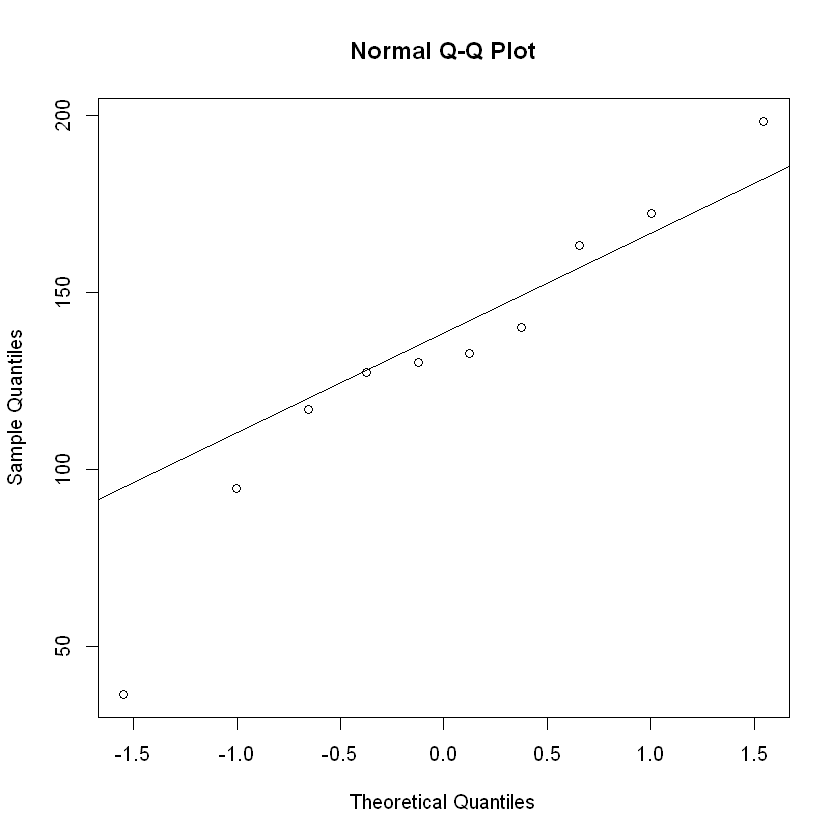

In [148]:
qqnorm(Group5$`SAPONIFICATION VALUE`)
qqline(Group5$`SAPONIFICATION VALUE`)

In [140]:
#Assumption 4: Homogeneneity of variances
bartlett.test(`SAPONIFICATION VALUE` ~ Group, data = dataoneway) # p.value is <0.05 which infers that the variance of `specific gravity` across
#groups are not equal


	Bartlett test of homogeneity of variances

data:  SAPONIFICATION VALUE by Group
Bartlett's K-squared = 43.18, df = 5, p-value = 3.397e-08


In [139]:
### Welch’s anova for unequal variances

oneway.test(`SAPONIFICATION VALUE` ~ Group, data = dataoneway,
            var.equal=FALSE)

 #p value is < 0.05, there is a difference in AT LEAST ON OF THE ACID VALUE between markets


	One-way analysis of means (not assuming equal variances)

data:  `SAPONIFICATION VALUE` and Group
F = 7.0174, num df = 5.000, denom df = 23.649, p-value = 0.0003777


In [138]:
#Post-hoc test TukeyHSD - Test which of the groups have different means
model1 = lm(`SAPONIFICATION VALUE` ~ Group, data = dataoneway)
anova(model1)

#Post-hoc test TukeyHSD - Test which of the groups have different means
TukeyHSD(aov(model1)) #P-vale of any 2 groups that is < 0.05 are significantly different

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,5,38138.14,7627.627,3.965466,0.003897802
Residuals,54,103869.72,1923.513,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model1)

$Group
           diff        lwr        upr     p adj
AY-AG  42.10850  -15.84019 100.057188 0.2796045
BA-AG  28.15850  -29.79019  86.107188 0.7054379
IF-AG  43.21850  -14.73019 101.167188 0.2531545
IK-AG -24.98850  -82.93719  32.960188 0.7976339
LA-AG  -1.95359  -59.90228  55.995098 0.9999985
BA-AY -13.95000  -71.89869  43.998688 0.9797871
IF-AY   1.11000  -56.83869  59.058688 0.9999999
IK-AY -67.09700 -125.04569  -9.148312 0.0144146
LA-AY -44.06209 -102.01078  13.886598 0.2341892
IF-BA  15.06000  -42.88869  73.008688 0.9717526
IK-BA -53.14700 -111.09569   4.801688 0.0898372
LA-BA -30.11209  -88.06078  27.836598 0.6434974
IK-IF -68.20700 -126.15569 -10.258312 0.0122718
LA-IF -45.17209 -103.12078  12.776598 0.2107428
LA-IK  23.03491  -34.91378  80.983598 0.8469542
